<a href="https://colab.research.google.com/github/Shayantan1012/PV-Forcast-Project/blob/main/PV_Forcasting_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/XAI /Other data/PVGen-1.csv')
dataset=pd.DataFrame(dataset)
print(dataset.head())

               Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  01-01-2017 00:00                 0  0.0   1.6      1021       100   
1  01-01-2017 00:15                 0  0.0   1.6      1021       100   
2  01-01-2017 00:30                 0  0.0   1.6      1021       100   
3  01-01-2017 00:45                 0  0.0   1.6      1021       100   
4  01-01-2017 01:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0            

In [3]:
print(dataset.isna().sum())
print(dataset.columns)
print(len(dataset.columns))

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64
Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')
17


In [4]:
print(dataset.tail())

                    Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
196771  31-08-2022 16:45               118  23.7  18.6      1023        57   
196772  31-08-2022 17:00                82  15.6  18.5      1023        61   
196773  31-08-2022 17:15                51   8.0  18.5      1023        61   
196774  31-08-2022 17:30                24   2.1  18.5      1023        61   
196775  31-08-2022 17:45                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  \
196771         3.8      0.0      0.0          52      1           780   
196772         4.2      0.0      0.0          60      1           795   
196773         4.2      0.0      0.0          60      1           810   
196774         4.2      0.0      0.0          60      1           825   
196775         4.2      0.0      0.0          60      0             0   

        dayLength  SunlightTime/daylength  weather_type  hour  month  
196771        825    

In [5]:
print(dataset.columns)
dataset['Time']

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')


0         01-01-2017 00:00
1         01-01-2017 00:15
2         01-01-2017 00:30
3         01-01-2017 00:45
4         01-01-2017 01:00
                ...       
196771    31-08-2022 16:45
196772    31-08-2022 17:00
196773    31-08-2022 17:15
196774    31-08-2022 17:30
196775    31-08-2022 17:45
Name: Time, Length: 196776, dtype: object

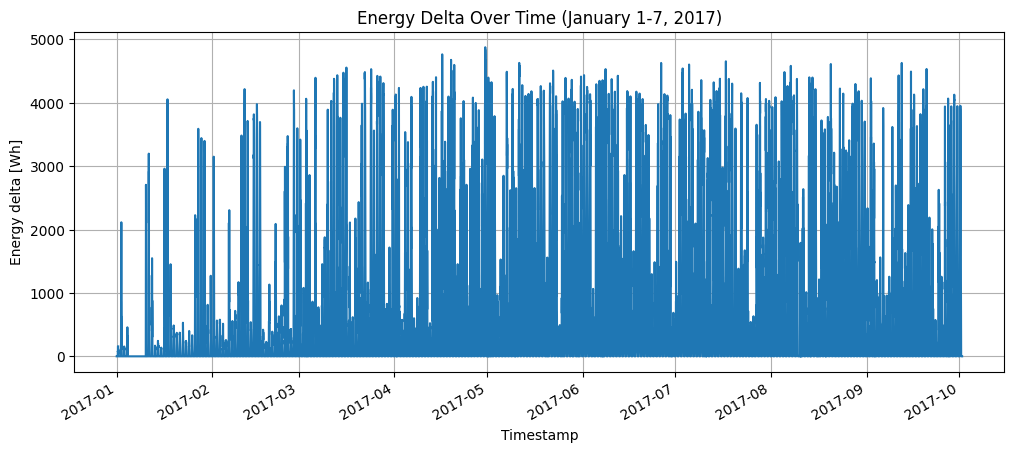

In [6]:
import matplotlib.pyplot as plt
start_time='2018-01-01'
end_time='2022-12-31'
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%d-%m-%Y %H:%M')  # Adjust format to match your data
dataset.set_index('Time', inplace=True)
dataset = dataset[~((dataset.index >= start_time) & (dataset.index <= end_time))]
filtered_data = dataset['2017-01-01':'2017-10-01']  # Use YYYY-MM-DD format for slicing

filtered_data['Energy delta[Wh]'].plot(figsize=(12, 5), title="Energy Delta Over Time (January 1-7, 2017)")
plt.xlabel("Timestamp")
plt.ylabel("Energy delta [Wh]")
plt.grid(True)
plt.show()



In [7]:

Y=dataset['Energy delta[Wh]']
X=dataset.drop(columns=['Energy delta[Wh]'],axis=1)


print("X Head->",X.head)
print("X Tail->",X.tail)


X Head-> <bound method NDFrame.head of                      GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                      
2017-01-01 00:00:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:15:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:30:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:45:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 01:00:00  0.0   1.7      1020       100         5.2     0.00   
...                  ...   ...       ...       ...         ...      ...   
2017-12-31 22:45:00  0.0   9.4       997        89         5.8     0.47   
2017-12-31 23:00:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:15:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:30:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:45:00  0.0  10.1       997        89         5.

In [8]:
print(dataset.index)
print(type(dataset.index))

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:15:00',
               '2017-01-01 00:30:00', '2017-01-01 00:45:00',
               '2017-01-01 01:00:00', '2017-01-01 01:15:00',
               '2017-01-01 01:30:00', '2017-01-01 01:45:00',
               '2017-01-01 02:00:00', '2017-01-01 02:15:00',
               ...
               '2017-12-31 21:30:00', '2017-12-31 21:45:00',
               '2017-12-31 22:00:00', '2017-12-31 22:15:00',
               '2017-12-31 22:30:00', '2017-12-31 22:45:00',
               '2017-12-31 23:00:00', '2017-12-31 23:15:00',
               '2017-12-31 23:30:00', '2017-12-31 23:45:00'],
              dtype='datetime64[ns]', name='Time', length=34560, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [9]:
CorrelationMatrix=X.corr()
CorrelationMatrix

GHI      temp  pressure  humidity  wind_speed  \
GHI                     1.000000  0.474885  0.079013 -0.589756    0.010950   
temp                    0.474885  1.000000 -0.128212 -0.407187   -0.024327   
pressure                0.079013 -0.128212  1.000000 -0.119310   -0.377278   
humidity               -0.589756 -0.407187 -0.119310  1.000000   -0.109064   
wind_speed              0.010950 -0.024327 -0.377278 -0.109064    1.000000   
rain_1h                -0.045641  0.127051 -0.227288  0.144236    0.138086   
snow_1h                -0.054824 -0.127956 -0.158364  0.089307    0.083665   
clouds_all             -0.157036 -0.051666 -0.186014  0.248429    0.114233   
isSun                   0.584392  0.332853  0.005039 -0.376696    0.070401   
sunlightTime            0.532576  0.487920 -0.002805 -0.581897    0.042944   
dayLength               0.393756  0.722466  0.025609 -0.343803   -0.186509   
SunlightTime/daylength  0.463940  0.364599 -0.002780 -0.524589    0.076434   
weather_type           -0.118771 -0.011868 -0.266501  0.246914    0.184997   
hour                   -0.078287  0.098976 -0.000144 -0.192171   -0.000529   
month                  -0.066691  0.245162 -0.229153  0.181559    0.133388   

                         rain_1h   snow_1h  clouds_all     isSun  \
GHI                    -0.045641 -0.054824   -0.157036  0.584392   
temp                    0.127051 -0.127956   -0.051666  0.332853   
pressure               -0.227288 -0.158364   -0.186014  0.005039   
humidity                0.144236  0.089307    0.248429 -0.376696   
wind_speed              0.138086  0.083665    0.114233  0.070401   
rain_1h                 1.000000 -0.029216    0.181737  0.060296   
snow_1h                -0.029216  1.000000    0.080058 -0.046300   
clouds_all              0.181737  0.080058    1.000000  0.022194   
isSun                   0.060296 -0.046300    0.022194  1.000000   
sunlightTime            0.089712 -0.055164   -0.008978  0.743712   
dayLength               0.112428 -0.109539   -0.158692  0.269446   
SunlightTime/daylength  0.069499 -0.045510    0.013261  0.775978   
weather_type            0.353668  0.135714    0.886661  0.058988   
hour                    0.016658  0.006434   -0.030241 -0.150440   
month                   0.030478 -0.045933    0.093316 -0.049061   

                        sunlightTime     dayLength  SunlightTime/daylength  \
GHI                         0.532576  3.937564e-01                0.463940   
temp                        0.487920  7.224661e-01                0.364599   
pressure                   -0.002805  2.560916e-02               -0.002780   
humidity                   -0.581897 -3.438027e-01               -0.524589   
wind_speed                  0.042944 -1.865087e-01                0.076434   
rain_1h                     0.089712  1.124278e-01                0.069499   
snow_1h                    -0.055164 -1.095393e-01               -0.045510   
clouds_all                 -0.008978 -1.586917e-01                0.013261   
isSun                       0.743712  2.694456e-01                0.775978   
sunlightTime                1.000000  3.696745e-01                0.957334   
dayLength                   0.369674  1.000000e+00                0.204951   
SunlightTime/daylength      0.957334  2.049506e-01                1.000000   
weather_type                0.043357 -1.015818e-01                0.055595   
hour                        0.141127 -2.677222e-15                0.132725   
month                      -0.060781 -1.820799e-01               -0.037313   

                        weather_type          hour         month  
GHI                        -0.118771 -7.828725e-02 -6.669076e-02  
temp                       -0.011868  9.897590e-02  2.451618e-01  
pressure                   -0.266501 -1.436783e-04 -2.291535e-01  
humidity                    0.246914 -1.921712e-01  1.815586e-01  
wind_speed                  0.184997 -5.291639e-04  1.333884e-01  
rain_1h                     0.353668  1.

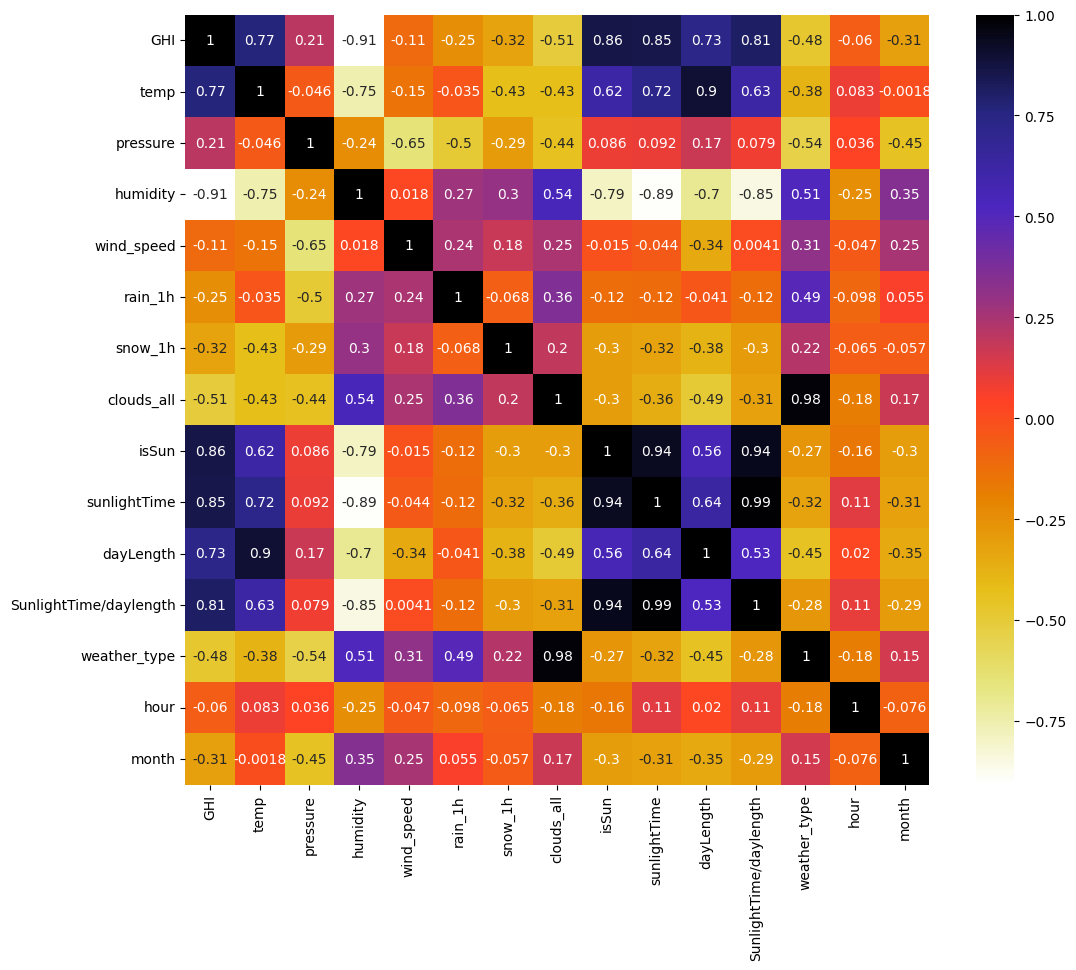

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = CorrelationMatrix.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [12]:
correlation=correlation(X,0.9)
print(correlation)
X=X.drop(correlation,axis=1)
X

{'SunlightTime/daylength'}


GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                      
2017-01-01 00:00:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:15:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:30:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 00:45:00  0.0   1.6      1021       100         4.9     0.00   
2017-01-01 01:00:00  0.0   1.7      1020       100         5.2     0.00   
...                  ...   ...       ...       ...         ...      ...   
2017-12-31 22:45:00  0.0   9.4       997        89         5.8     0.47   
2017-12-31 23:00:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:15:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:30:00  0.0  10.1       997        89         5.6     0.41   
2017-12-31 23:45:00  0.0  10.1       997        89         5.6     0.41   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Time                                                                       
2017-01-01 00:00:00      0.0         100      0             0        450   
2017-01-01 00:15:00      0.0         100      0             0        450   
2017-01-01 00:30:00      0.0         100      0             0        450   
2017-01-01 00:45:00      0.0         100      0             0        450   
2017-01-01 01:00:00      0.0         100      0             0        450   
...                      ...         ...    ...           ...        ...   
2017-12-31 22:45:00      0.0         100      0             0        450   
2017-12-31 23:00:00      0.0         100      0             0        450   
2017-12-31 23:15:00      0.0         100      0             0        450   
2017-12-31 23:30:00      0.0         100      0             0        450   
2017-12-31 23:45:00      0.0         100      0             0        450   

                     weather_type  hour  month  
Time                                            
2017-01-01 00:00:00             4     0      1  
2017-01-01 00:15:00             4     0      1  
2017-01-01 00:30:00             4     0      1  
2017-01-01 00:45:00             4     0      1  
2017-01-01 01:00:00             4     1      1  
...                           ...   ...    ...  
2017-12-31 22:45:00             5    22     12  
2017-12-31 23:00:00             5    23     12  
2017-12-31 23:15:00             5    23     12  
2017-12-31 23:30:00             5    23     12  
2017-12-31 23:45:00             5    23     12  

[34560 rows x 14 columns]

In [13]:
!pip install mlxtend
!pip install --upgrade scikit-learn mlxtend


In [14]:
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [15]:
bakward_feature_selector = SequentialFeatureSelector(LinearRegression(n_jobs=1),
                                                    k_features=5,
                                                    forward=False,
                                                    floating=False,
                                                    verbose=2,
                                                    scoring= "r2",
                                                    cv= 5).fit(X,Y)


[2024-12-20 16:57:59] Features: 13/5 -- score: 0.7622958917187123
[2024-12-20 16:58:04] Features: 12/5 -- score: 0.7653659502937746
[2024-12-20 16:58:10] Features: 11/5 -- score: 0.7656912909605733
[2024-12-20 16:58:15] Features: 10/5 -- score: 0.7659234172980119
[2024-12-20 16:58:18] Features: 9/5 -- score: 0.7660312810590341
[2024-12-20 16:58:22] Features: 8/5 -- score: 0.7662145463165808
[2024-12-20 16:58:24] Features: 7/5 -- score: 0.766149087226643
[2024-12-20 16:58:26] Features: 6/5 -- score: 0.7659388075768204
[2024-12-20 16:58:27] Features: 5/5 -- score: 0.765526337280954

In [16]:
columns=bakward_feature_selector.k_feature_names_
columns


('GHI', 'temp', 'humidity', 'isSun', 'sunlightTime')

In [17]:
bakward_feature_selector.k_score_

0.765526337280954

In [18]:
X = X[[col for col in X.columns if col in columns]]
X.head()

GHI  temp  humidity  isSun  sunlightTime
Time                                                         
2017-01-01 00:00:00  0.0   1.6       100      0             0
2017-01-01 00:15:00  0.0   1.6       100      0             0
2017-01-01 00:30:00  0.0   1.6       100      0             0
2017-01-01 00:45:00  0.0   1.6       100      0             0
2017-01-01 01:00:00  0.0   1.7       100      0             0

In [19]:
print(dataset.head())

                     Energy delta[Wh]  GHI  temp  pressure  humidity  \
Time                                                                   
2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

                     wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
Time                                                                   
2017-01-01 00:00:00         4.9      0.0      0.0         100      0   
2017-01-01 00:15:00         4.9      0.0      0.0         100      0   
2017-01-01 00:30:00         4.9      0.0      0.0         100      0   
2017-01-01 00:45:00         4.9      0.0      0.0         100      0   
2017-01-01 01:00:00         5.2      0.0      0.0         100  

In [20]:
!pip install statsmodels

# ***ARIMA MODEL***

In [21]:
from sklearn.model_selection import train_test_split
X_train_A,X_test_A,Y_train_A,Y_test_A=train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False);
X_train_A.shape,X_test_A.shape

((27648, 5), (6912, 5))

In [22]:
Y_train_A

Time
2017-01-01 00:00:00    0
2017-01-01 00:15:00    0
2017-01-01 00:30:00    0
2017-01-01 00:45:00    0
2017-01-01 01:00:00    0
                      ..
2017-10-20 22:45:00    0
2017-10-20 23:00:00    0
2017-10-20 23:15:00    0
2017-10-20 23:30:00    0
2017-10-20 23:45:00    0
Name: Energy delta[Wh], Length: 27648, dtype: int64

In [23]:

from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)



adf_test(Y_train_A)

1. ADF :  -29.04046571784692
2. P-Value :  0.0
3. Num Of Lags :  49
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 27598
5. Critical Values :
	 1% :  -3.4305869703723735
	 5% :  -2.861644734164414
	 10% :  -2.5668257468578424


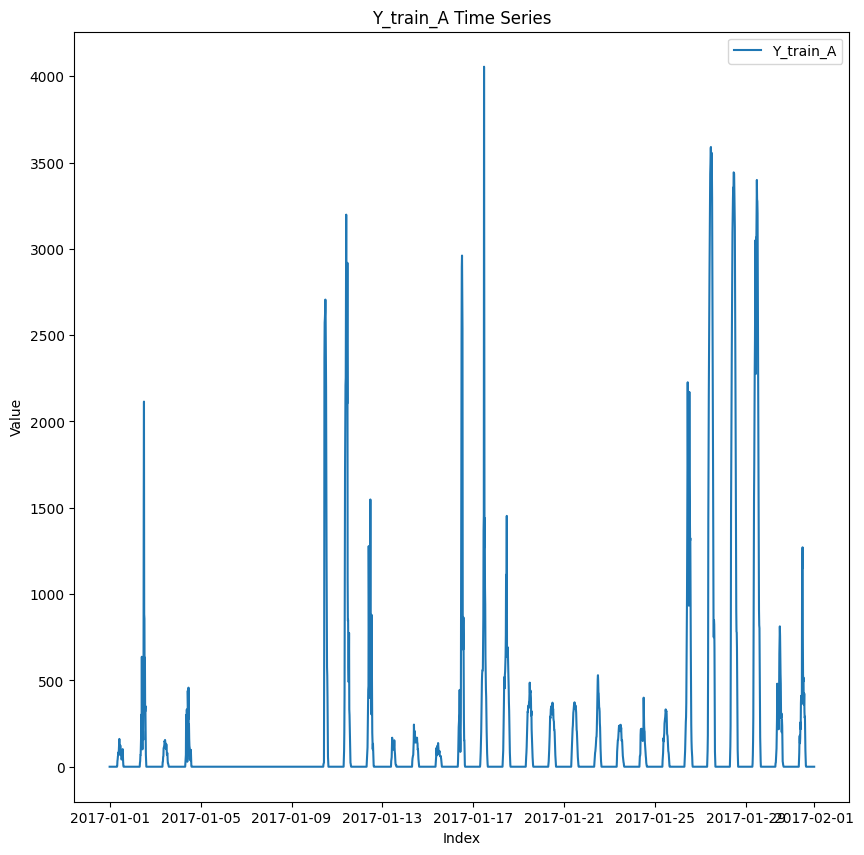

In [24]:
plt.figure(figsize=(10, 10))  # Width = 20, Height = 10
start_time='2017-02-01'
end_time='2017-11-01'

# Plot the data
plot_data=Y_train_A
plot_data = plot_data[~((Y_train_A.index >= start_time) & (Y_train_A.index <= end_time))]
plt.plot(plot_data, label="Y_train_A")
plt.title("Y_train_A Time Series")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

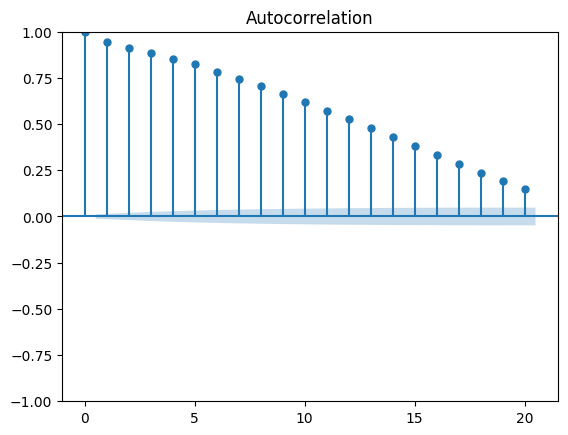

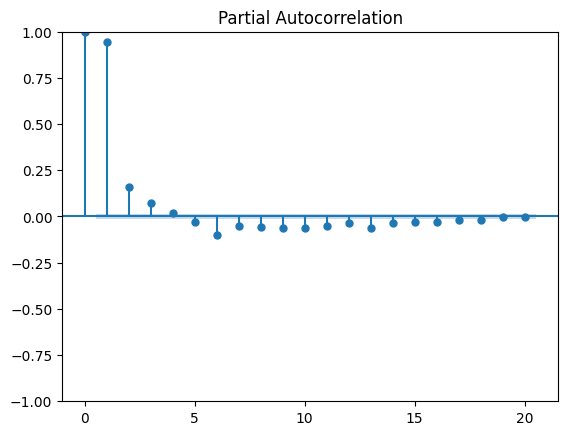

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Y_train_A, lags=20)
plt.show()
plot_pacf(Y_train_A, lags=20)
plt.show()

In [26]:
Y_train_A=Y_train_A.to_frame()

Y_train_A

Energy delta[Wh]
Time                                 
2017-01-01 00:00:00                 0
2017-01-01 00:15:00                 0
2017-01-01 00:30:00                 0
2017-01-01 00:45:00                 0
2017-01-01 01:00:00                 0
...                               ...
2017-10-20 22:45:00                 0
2017-10-20 23:00:00                 0
2017-10-20 23:15:00                 0
2017-10-20 23:30:00                 0
2017-10-20 23:45:00                 0

[27648 rows x 1 columns]

In [27]:
Y_train_A_2=Y_train_A.diff().dropna()
Y_train_A_2

Energy delta[Wh]
Time                                 
2017-01-01 00:15:00               0.0
2017-01-01 00:30:00               0.0
2017-01-01 00:45:00               0.0
2017-01-01 01:00:00               0.0
2017-01-01 01:15:00               0.0
...                               ...
2017-10-20 22:45:00               0.0
2017-10-20 23:00:00               0.0
2017-10-20 23:15:00               0.0
2017-10-20 23:30:00               0.0
2017-10-20 23:45:00               0.0

[27647 rows x 1 columns]

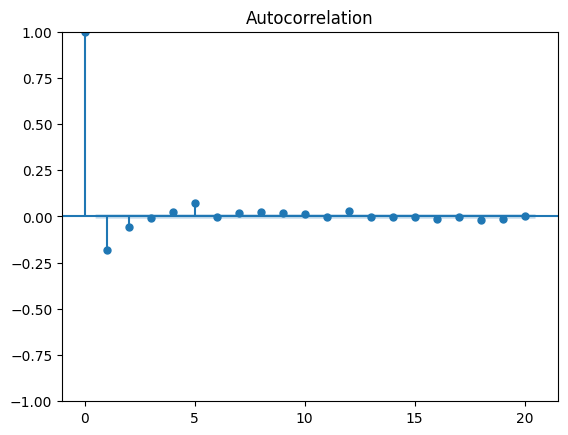

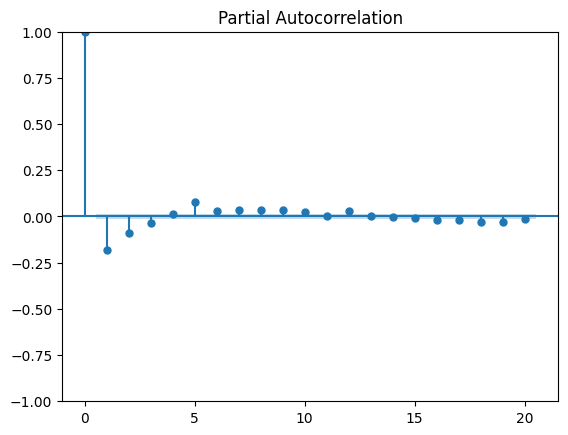

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Y_train_A_2, lags=20)
plt.show()
plot_pacf(Y_train_A_2, lags=20)
plt.show()

In [29]:
adf_test(Y_train_A_2)

1. ADF :  -32.62765784684369
2. P-Value :  0.0
3. Num Of Lags :  49
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 27597
5. Critical Values :
	 1% :  -3.430586978959989
	 5% :  -2.861644737959744
	 10% :  -2.5668257488780095


In [30]:
Y_train_A.tail()

Energy delta[Wh]
Time                                 
2017-10-20 22:45:00                 0
2017-10-20 23:00:00                 0
2017-10-20 23:15:00                 0
2017-10-20 23:30:00                 0
2017-10-20 23:45:00                 0

In [31]:
# !pip install pmdarima

In [32]:
# from pmdarima import auto_arima

# stepwise_fit = auto_arima(Y_train_A,
#                           seasonal=True,
#                           m=12,  # Set the seasonal period (S)
#                           trace=True,
#                           suppress_warnings=True)

# print(stepwise_fit.summary())


In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model
modelA = SARIMAX(Y_train_A_2['Energy delta[Wh]'].diff().dropna(),
                order=(2,1,2),  # ARIMA order
                seasonal_order=(2,0,1, 12),
                enforce_stationarity=True,
                enforce_invertibility=True)

# Fit the model
modelA = modelA.fit()

# Print the summary of the fitted model
print(modelA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                     Energy delta[Wh]   No. Observations:                27646
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 12)   Log Likelihood                   0.000
Date:                              Fri, 20 Dec 2024   AIC                             16.000
Time:                                      18:17:12   BIC                             81.818
Sample:                                           0   HQIC                            37.201
                                            - 27646                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9998   2.28e-08   8.76e+07      0.000       2.000       2.000
ar.L2         -0.99

In [34]:
start=len(Y_train_A)
end=len(Y_train_A)+len(Y_test_A)-1
start,end

(27648, 34559)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-35-6b7e238f3346>:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_future_dates = pd.date_range(start='2017-10-20', periods=len(pred), freq='15T')


2017-10-20 00:00:00    1.472766
2017-10-20 00:15:00    0.392225
2017-10-20 00:30:00   -0.558054
2017-10-20 00:45:00    3.141802
2017-10-20 01:00:00   -0.962143
                         ...   
2017-12-30 22:45:00   -0.064465
2017-12-30 23:00:00    0.071548
2017-12-30 23:15:00   -0.065823
2017-12-30 23:30:00    0.077277
2017-12-30 23:45:00   -0.082071
Freq: 15min, Name: SARIMAX predictions, Length: 6912, dtype: float64
Time
2017-10-21 00:00:00    0
2017-10-21 00:15:00    0
2017-10-21 00:30:00    0
2017-10-21 00:45:00    0
2017-10-21 01:00:00    0
                      ..
2017-12-31 22:45:00    0
2017-12-31 23:00:00    0
2017-12-31 23:15:00    0
2017-12-31 23:30:00    0
2017-12-31 23:45:00    0
Name: Energy delta[Wh], Length: 6912, dtype: int64


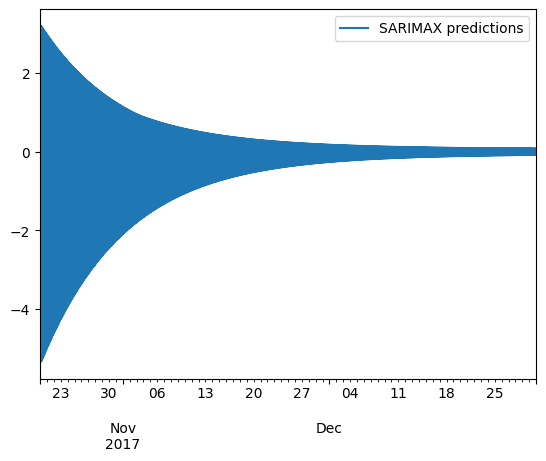

In [35]:
start=len(Y_train_A)
end=len(Y_train_A)+len(Y_test_A)-1

#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph

pred = modelA.predict(start=start, end=end, typ='levels').rename('SARIMAX predictions')

index_future_dates = pd.date_range(start='2017-10-20', periods=len(pred), freq='15T')
pred.index=index_future_dates
pred.plot(legend=True)
print(pred)
print(Y_test_A)

# **LSTM MODEL**

In [36]:
X_L=X
Y_L=Y
X.shape
st_time='2017-01-01'
X_L

GHI  temp  humidity  isSun  sunlightTime
Time                                                         
2017-01-01 00:00:00  0.0   1.6       100      0             0
2017-01-01 00:15:00  0.0   1.6       100      0             0
2017-01-01 00:30:00  0.0   1.6       100      0             0
2017-01-01 00:45:00  0.0   1.6       100      0             0
2017-01-01 01:00:00  0.0   1.7       100      0             0
...                  ...   ...       ...    ...           ...
2017-12-31 22:45:00  0.0   9.4        89      0             0
2017-12-31 23:00:00  0.0  10.1        89      0             0
2017-12-31 23:15:00  0.0  10.1        89      0             0
2017-12-31 23:30:00  0.0  10.1        89      0             0
2017-12-31 23:45:00  0.0  10.1        89      0             0

[34560 rows x 5 columns]

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_L

GHI  temp  humidity  isSun  sunlightTime
Time                                                         
2017-01-01 00:00:00  0.0   1.6       100      0             0
2017-01-01 00:15:00  0.0   1.6       100      0             0
2017-01-01 00:30:00  0.0   1.6       100      0             0
2017-01-01 00:45:00  0.0   1.6       100      0             0
2017-01-01 01:00:00  0.0   1.7       100      0             0
...                  ...   ...       ...    ...           ...
2017-12-31 22:45:00  0.0   9.4        89      0             0
2017-12-31 23:00:00  0.0  10.1        89      0             0
2017-12-31 23:15:00  0.0  10.1        89      0             0
2017-12-31 23:30:00  0.0  10.1        89      0             0
2017-12-31 23:45:00  0.0  10.1        89      0             0

[34560 rows x 5 columns]

In [39]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_L = Y_L.to_frame()
X_L=pd.concat([X_L,Y_L],axis=1)

scaled_values = scaler.fit_transform(X_L)
scaled_values.shape


(34560, 6)

In [40]:
X_L
features_col=X_L.columns
print(features_col)

Index(['GHI', 'temp', 'humidity', 'isSun', 'sunlightTime', 'Energy delta[Wh]'], dtype='object')


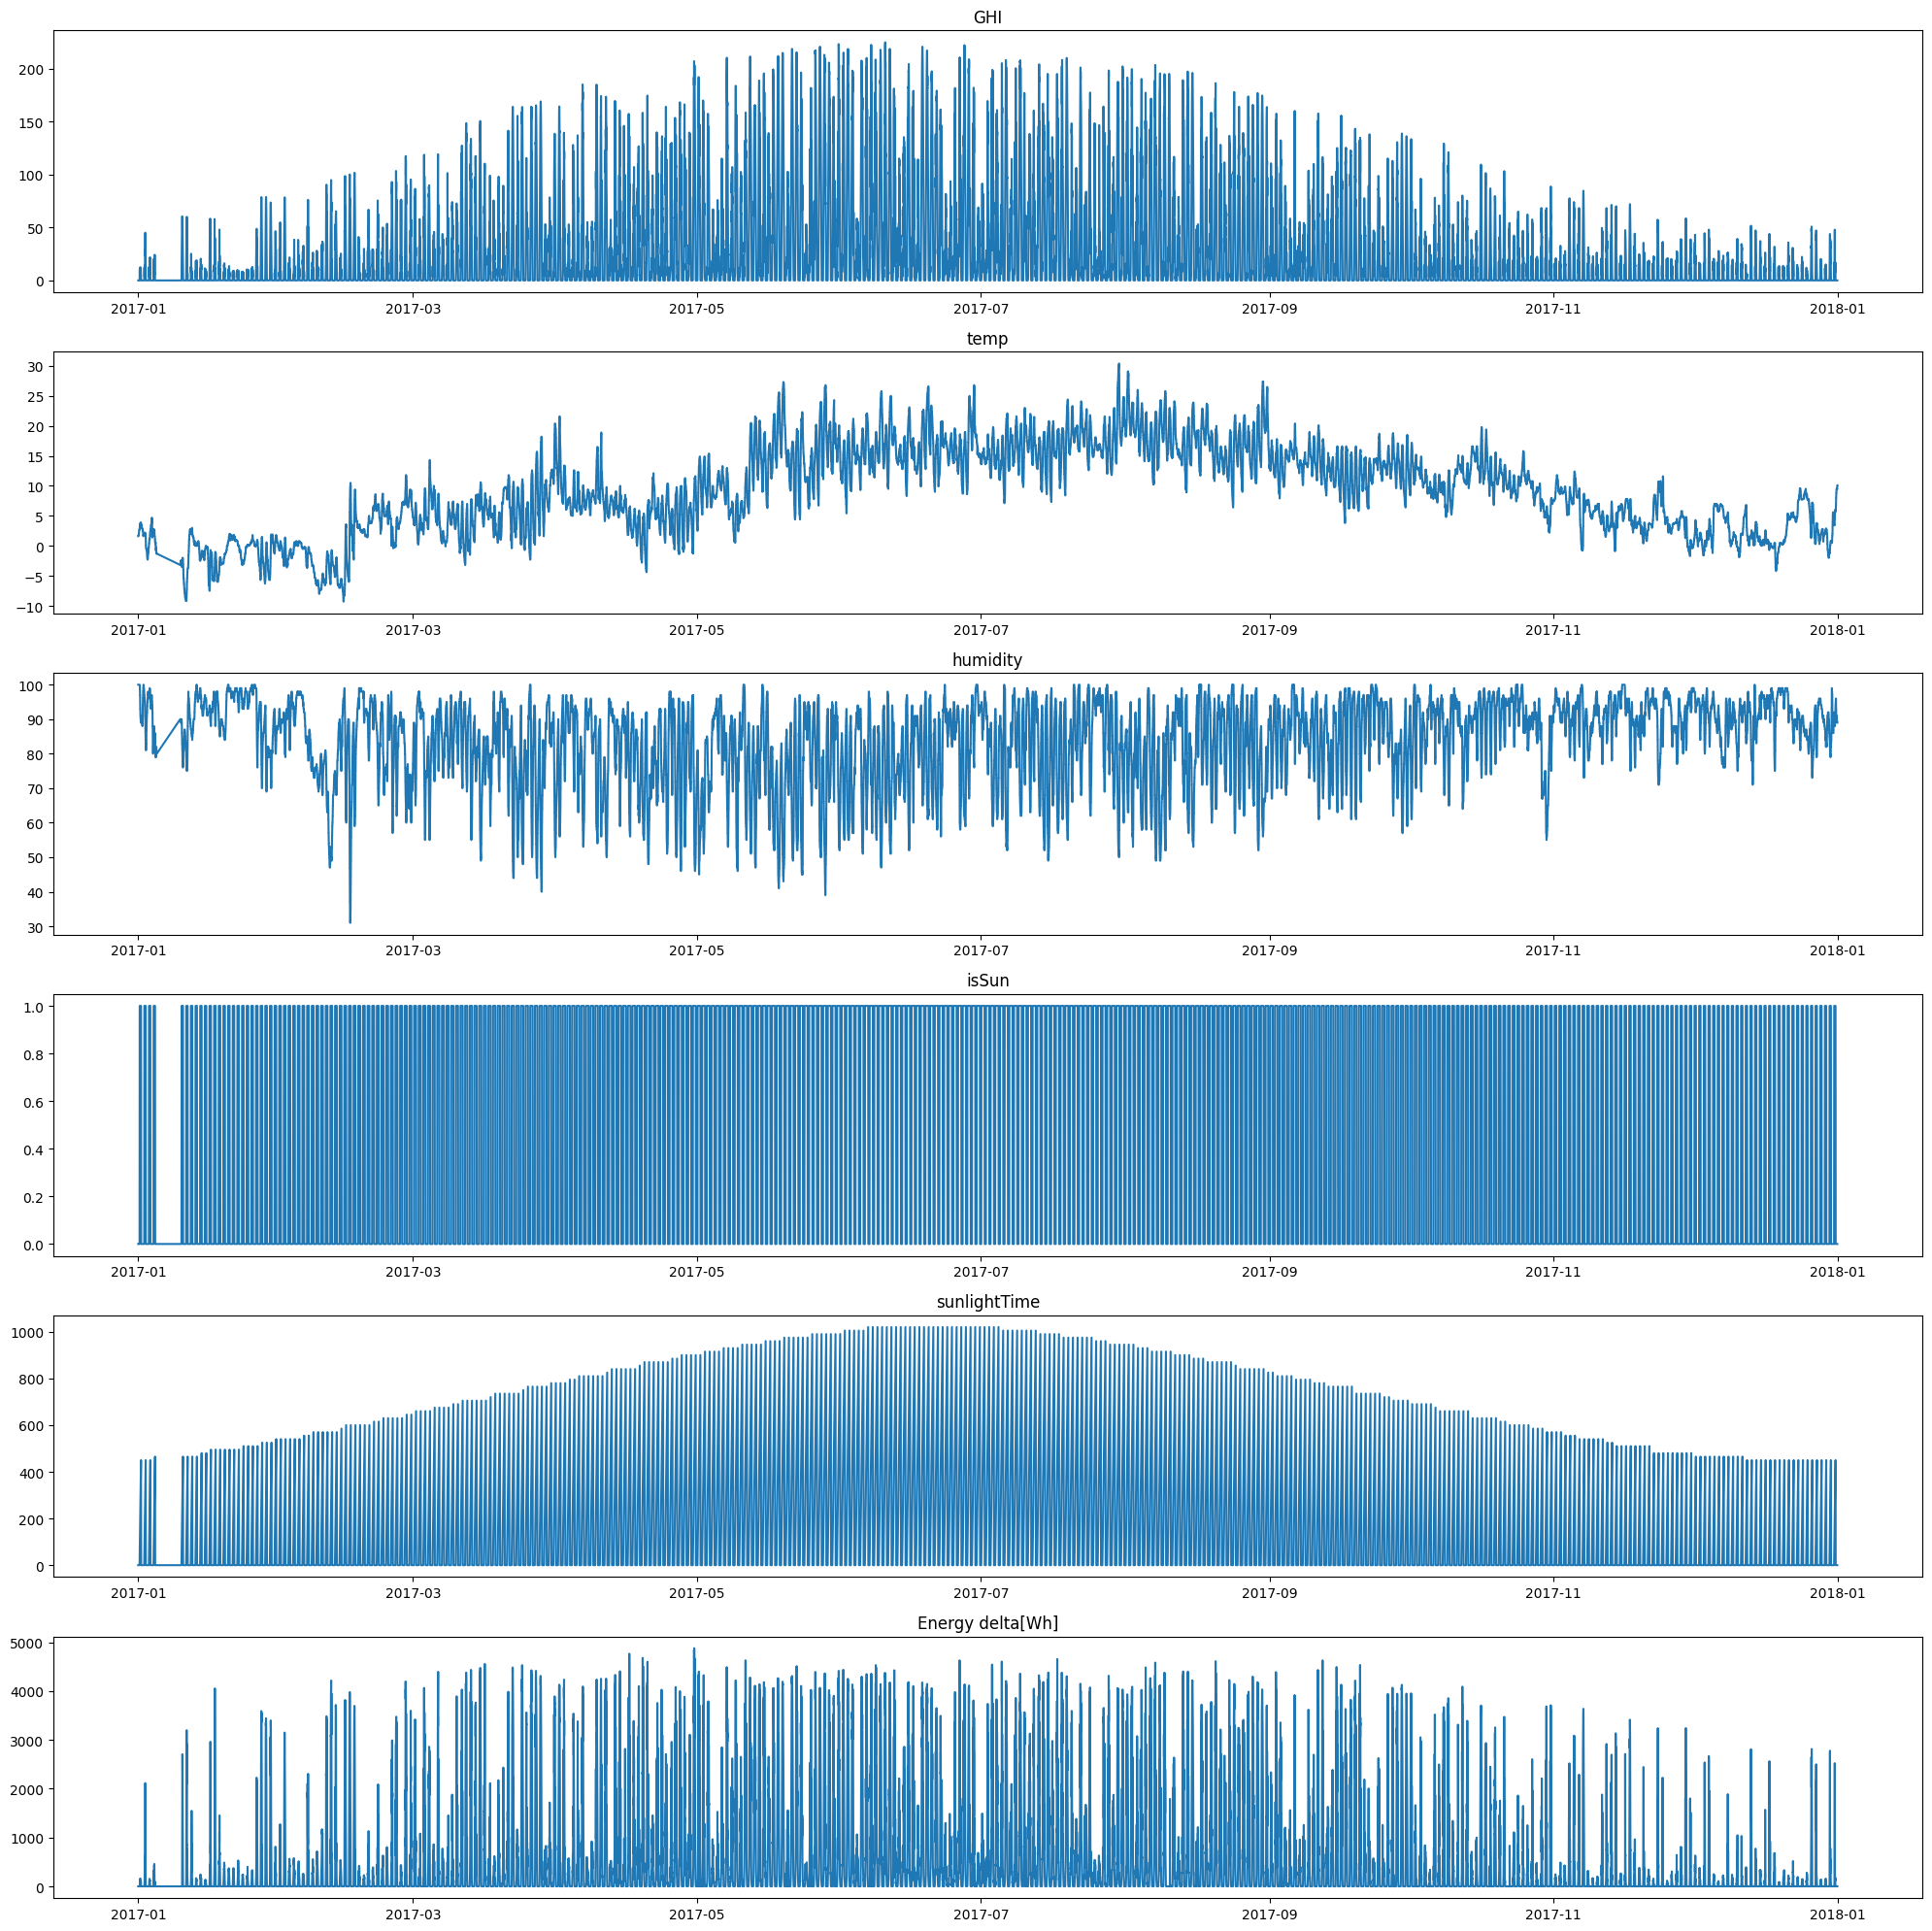

In [41]:
figure, axes = plt.subplots(len(X_L.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2017-01-01')
end_time = pd.to_datetime('2021-01-01')

for ax,col in zip(axes,X_L.columns):
    ax.plot(X_L[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [42]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_L_scaled, Y_L_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [43]:
import tensorflow as tf


# Ensure that TensorFlow uses GPU and sets memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for all GPUs (or specific ones)
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU memory growth set successfully")
    except RuntimeError as e:
        print(e)
else:
    print("No GPUs detected, using CPU")

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

No GPUs detected, using CPU


In [44]:
X_L_scaled.shape[1], X_L_scaled.shape[2]

(60, 6)

In [45]:
Y_L_scaled.shape[1]

6

In [46]:
modelL = Sequential([
    # Adding the first LSTM layer with Dropout
    LSTM(units=50, input_shape=(X_L_scaled.shape[1], X_L_scaled.shape[2])),
    Dropout(0.3),
    # Adding a Dense output layer
    Dense(Y_L_scaled.shape[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
#compilation
modelL.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])


In [48]:
#train-test-split

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L_scaled, Y_L_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_L.shape, y_train_L.shape, X_test_L.shape, y_test_L.shape

((27600, 60, 6), (27600, 6), (6900, 60, 6), (6900, 6))

In [49]:
Y_L_scaled

array([[0.        , 0.32493703, 0.86956522, 0.        , 0.        ,
        0.        ],
       [0.        , 0.32493703, 0.86956522, 0.        , 0.        ,
        0.        ],
       [0.        , 0.32493703, 0.86956522, 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.48866499, 0.84057971, 0.        , 0.        ,
        0.        ],
       [0.        , 0.48866499, 0.84057971, 0.        , 0.        ,
        0.        ],
       [0.        , 0.48866499, 0.84057971, 0.        , 0.        ,
        0.        ]])

In [50]:
history = modelL.fit(X_train_L, y_train_L,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=1,
                    verbose=1)

Epoch 1/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 394s 18ms/step - RootMeanSquaredError: 0.1317 - loss: 0.0186 - val_RootMeanSquaredError: 0.0742 - val_loss: 0.0055
Epoch 2/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 397s 16ms/step - RootMeanSquaredError: 0.0918 - loss: 0.0084 - val_RootMeanSquaredError: 0.0699 - val_loss: 0.0049
Epoch 3/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 382s 16ms/step - RootMeanSquaredError: 0.0883 - loss: 0.0078 - val_RootMeanSquaredError: 0.0695 - val_loss: 0.0048
Epoch 4/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 380s 16ms/step - RootMeanSquaredError: 0.0878 - loss: 0.0077 - val_RootMeanSquaredError: 0.0692 - val_loss: 0.0048
Epoch 5/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 401s 17ms/step - RootMeanSquaredError: 0.0863 - loss: 0.0074 - val_RootMeanSquaredError: 0.0669 - val_loss: 0.0045
Epoch 6/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 346s 16ms/step - RootMeanSquaredError: 0.0864 - loss: 0.0075 - val_RootMeanSquaredError: 0.0634 - val_loss: 0.0040
Epoch 7/10
22080/22080 ━━━━━━━━━━━━━━━━━━━━ 36

In [51]:
X_test_L.size

2484000

In [52]:

y_test_L=scaler.inverse_transform(y_test_L)


In [53]:
y_test_L

array([[ 0. , 11.4, 96. ,  0. ,  0. ,  0. ],
       [ 0. , 11.4, 96. ,  0. ,  0. ,  0. ],
       [ 0. , 11.4, 96. ,  0. ,  0. ,  0. ],
       ...,
       [ 0. , 10.1, 89. ,  0. ,  0. ,  0. ],
       [ 0. , 10.1, 89. ,  0. ,  0. ,  0. ],
       [ 0. , 10.1, 89. ,  0. ,  0. ,  0. ]])

In [54]:
y_test_L = pd.DataFrame(y_test_L)
y_test_inv_df =y_test_L
y_test_inv_df.columns=X_L.columns

y_test_inv_df.index = X_L.index[-len(y_test_L):]

print(y_test_inv_df)


                     GHI  temp  humidity  isSun  sunlightTime  \
Time                                                            
2017-10-21 03:00:00  0.0  11.4      96.0    0.0           0.0   
2017-10-21 03:15:00  0.0  11.4      96.0    0.0           0.0   
2017-10-21 03:30:00  0.0  11.4      96.0    0.0           0.0   
2017-10-21 03:45:00  0.0  11.4      96.0    0.0           0.0   
2017-10-21 04:00:00  0.0  10.8      96.0    0.0           0.0   
...                  ...   ...       ...    ...           ...   
2017-12-31 22:45:00  0.0   9.4      89.0    0.0           0.0   
2017-12-31 23:00:00  0.0  10.1      89.0    0.0           0.0   
2017-12-31 23:15:00  0.0  10.1      89.0    0.0           0.0   
2017-12-31 23:30:00  0.0  10.1      89.0    0.0           0.0   
2017-12-31 23:45:00  0.0  10.1      89.0    0.0           0.0   

                     Energy delta[Wh]  
Time                                   
2017-10-21 03:00:00               0.0  
2017-10-21 03:15:00               

In [55]:
X_test_L.shape

(6900, 60, 6)

In [56]:
yPred=modelL.predict(X_test_L)
yPred

216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


array([[-1.8566847e-04,  5.1875710e-01,  9.2610627e-01,  3.8010597e-02,
        -1.0427728e-02, -6.4874142e-03],
       [-1.1655986e-03,  5.1129293e-01,  9.3482298e-01,  3.8912535e-02,
        -9.9645406e-03, -7.3810518e-03],
       [-1.0355562e-03,  5.0916409e-01,  9.3702793e-01,  3.7676811e-02,
        -1.1328474e-02, -7.0622712e-03],
       ...,
       [ 2.2066981e-03,  4.7994354e-01,  8.5143375e-01,  3.4508944e-02,
        -1.1016622e-02, -3.4655035e-03],
       [-9.6632540e-04,  4.8269966e-01,  8.5310918e-01,  3.0229807e-02,
        -1.2769178e-02, -6.4795017e-03],
       [-3.7384033e-04,  4.8202473e-01,  8.5296202e-01,  2.8624296e-02,
        -1.4234826e-02, -6.1687976e-03]], dtype=float32)

In [57]:
yPred.shape

(6900, 6)

In [58]:
yPred

array([[-1.8566847e-04,  5.1875710e-01,  9.2610627e-01,  3.8010597e-02,
        -1.0427728e-02, -6.4874142e-03],
       [-1.1655986e-03,  5.1129293e-01,  9.3482298e-01,  3.8912535e-02,
        -9.9645406e-03, -7.3810518e-03],
       [-1.0355562e-03,  5.0916409e-01,  9.3702793e-01,  3.7676811e-02,
        -1.1328474e-02, -7.0622712e-03],
       ...,
       [ 2.2066981e-03,  4.7994354e-01,  8.5143375e-01,  3.4508944e-02,
        -1.1016622e-02, -3.4655035e-03],
       [-9.6632540e-04,  4.8269966e-01,  8.5310918e-01,  3.0229807e-02,
        -1.2769178e-02, -6.4795017e-03],
       [-3.7384033e-04,  4.8202473e-01,  8.5296202e-01,  2.8624296e-02,
        -1.4234826e-02, -6.1687976e-03]], dtype=float32)

In [59]:
yPred = pd.DataFrame(yPred)
y_pred_inv_df =yPred
y_pred_inv_df.columns=X_L.columns

y_pred_inv_df.index = X_L.index[-len(y_test_L):]

print(y_pred_inv_df)


                          GHI      temp  humidity     isSun  sunlightTime  \
Time                                                                        
2017-10-21 03:00:00 -0.000186  0.518757  0.926106  0.038011     -0.010428   
2017-10-21 03:15:00 -0.001166  0.511293  0.934823  0.038913     -0.009965   
2017-10-21 03:30:00 -0.001036  0.509164  0.937028  0.037677     -0.011328   
2017-10-21 03:45:00 -0.000549  0.509325  0.937958  0.039959     -0.009948   
2017-10-21 04:00:00 -0.000609  0.509398  0.938461  0.040323     -0.009820   
...                       ...       ...       ...       ...           ...   
2017-12-31 22:45:00 -0.000715  0.466097  0.852742  0.030763     -0.013450   
2017-12-31 23:00:00 -0.000509  0.466123  0.852552  0.029950     -0.013909   
2017-12-31 23:15:00  0.002207  0.479944  0.851434  0.034509     -0.011017   
2017-12-31 23:30:00 -0.000966  0.482700  0.853109  0.030230     -0.012769   
2017-12-31 23:45:00 -0.000374  0.482025  0.852962  0.028624     -0.014235   

In [60]:
y_pred_inv_df=scaler.inverse_transform(y_pred_inv_df)

In [61]:
y_pred_inv_df=pd.DataFrame(y_pred_inv_df)
y_pred_inv_df.columns=X_L.columns

y_pred_inv_df.index = X_L.index[-len(y_test_L):]

print(y_pred_inv_df)

                          GHI       temp   humidity     isSun  sunlightTime  \
Time                                                                          
2017-10-21 03:00:00 -0.041794  11.294657  94.901329  0.038011    -10.636283   
2017-10-21 03:15:00 -0.262376  10.998330  95.502785  0.038913    -10.163832   
2017-10-21 03:30:00 -0.233104  10.913815  95.654930  0.037677    -11.555043   
2017-10-21 03:45:00 -0.123517  10.920195  95.719101  0.039959    -10.146748   
2017-10-21 04:00:00 -0.137068  10.923096  95.753792  0.040323    -10.016643   
...                       ...        ...        ...       ...           ...   
2017-12-31 22:45:00 -0.160907   9.204055  89.839226  0.030763    -13.718495   
2017-12-31 23:00:00 -0.114487   9.205082  89.826118  0.029950    -14.187117   
2017-12-31 23:15:00  0.496728   9.753758  89.748932  0.034509    -11.236955   
2017-12-31 23:30:00 -0.217520   9.863176  89.864532  0.030230    -13.024561   
2017-12-31 23:45:00 -0.084151   9.836382  89.854378 

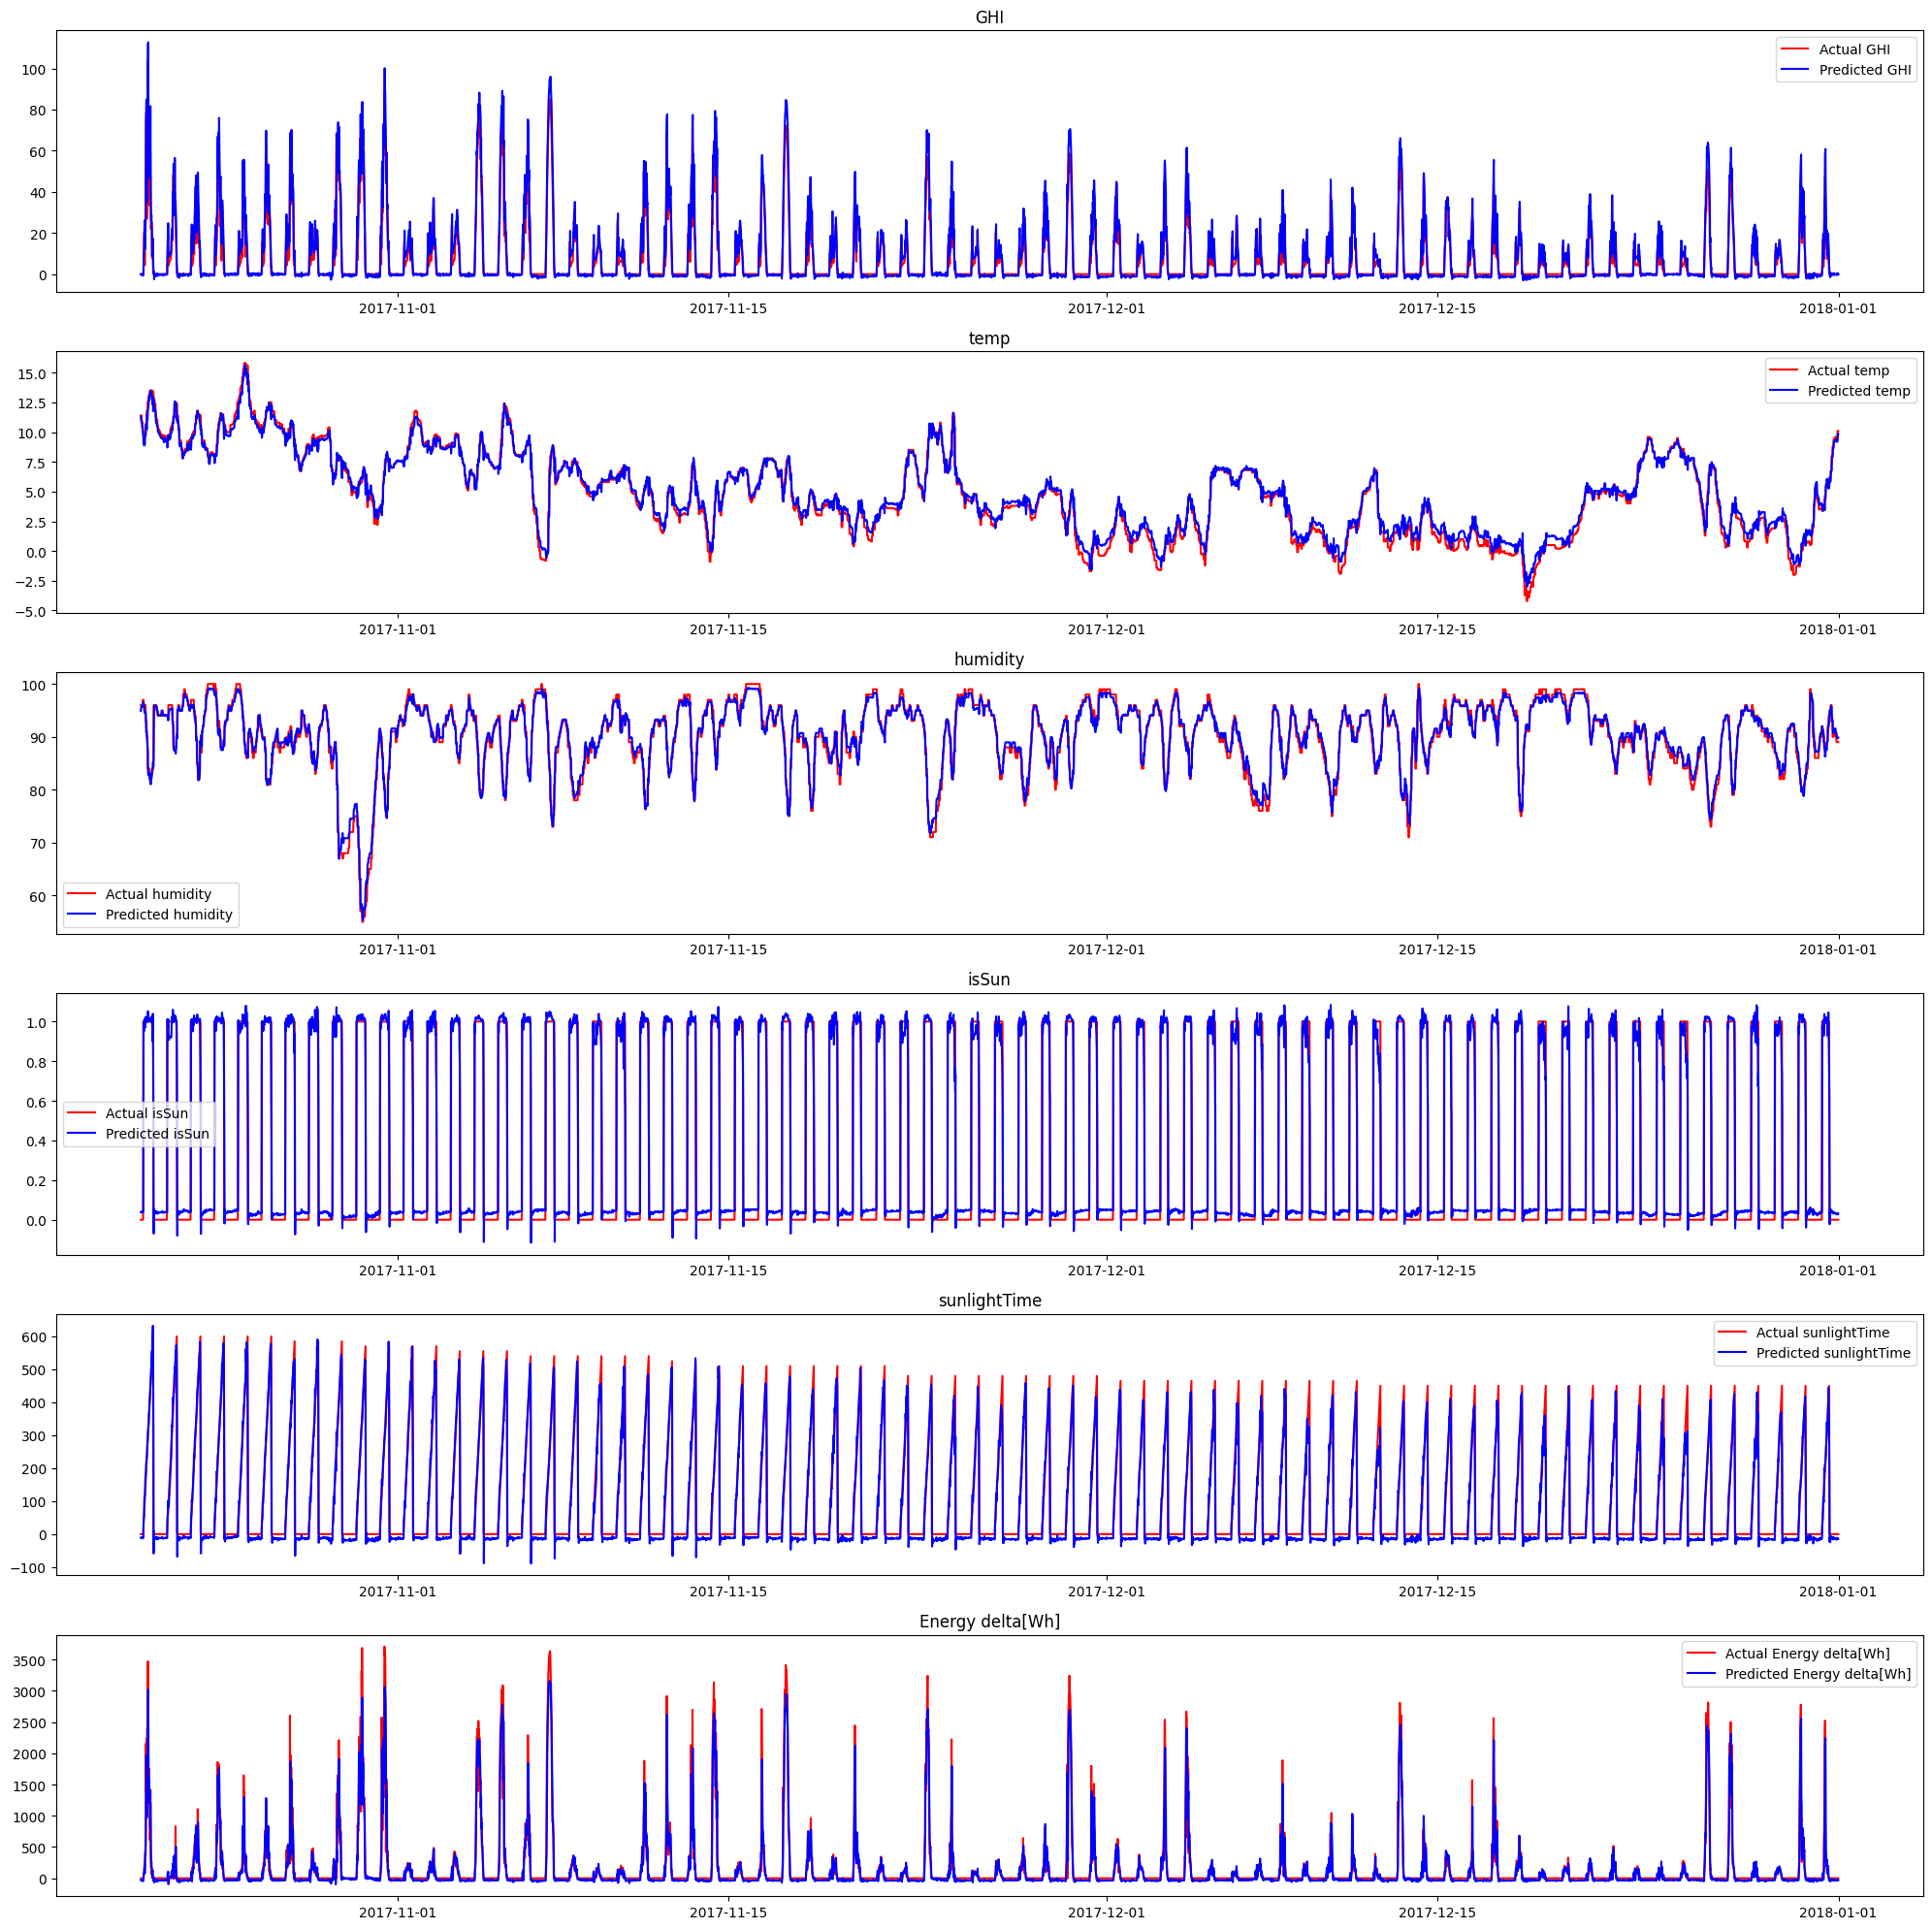

In [62]:
fig ,axes=plt.subplots(len(y_test_L.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_test_L.columns):
    ax.plot(y_test_L[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# ***VAR***

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


In [64]:
X_V=X
Y_V=Y
print(X_V)

                     GHI  temp  humidity  isSun  sunlightTime
Time                                                         
2017-01-01 00:00:00  0.0   1.6       100      0             0
2017-01-01 00:15:00  0.0   1.6       100      0             0
2017-01-01 00:30:00  0.0   1.6       100      0             0
2017-01-01 00:45:00  0.0   1.6       100      0             0
2017-01-01 01:00:00  0.0   1.7       100      0             0
...                  ...   ...       ...    ...           ...
2017-12-31 22:45:00  0.0   9.4        89      0             0
2017-12-31 23:00:00  0.0  10.1        89      0             0
2017-12-31 23:15:00  0.0  10.1        89      0             0
2017-12-31 23:30:00  0.0  10.1        89      0             0
2017-12-31 23:45:00  0.0  10.1        89      0             0

[34560 rows x 5 columns]


In [65]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_V = Y_V.to_frame()
X_V=pd.concat([X_V,Y_V],axis=1)

scaled_values = scaler.fit_transform(X_V)
scaled_values.shape


(34560, 6)

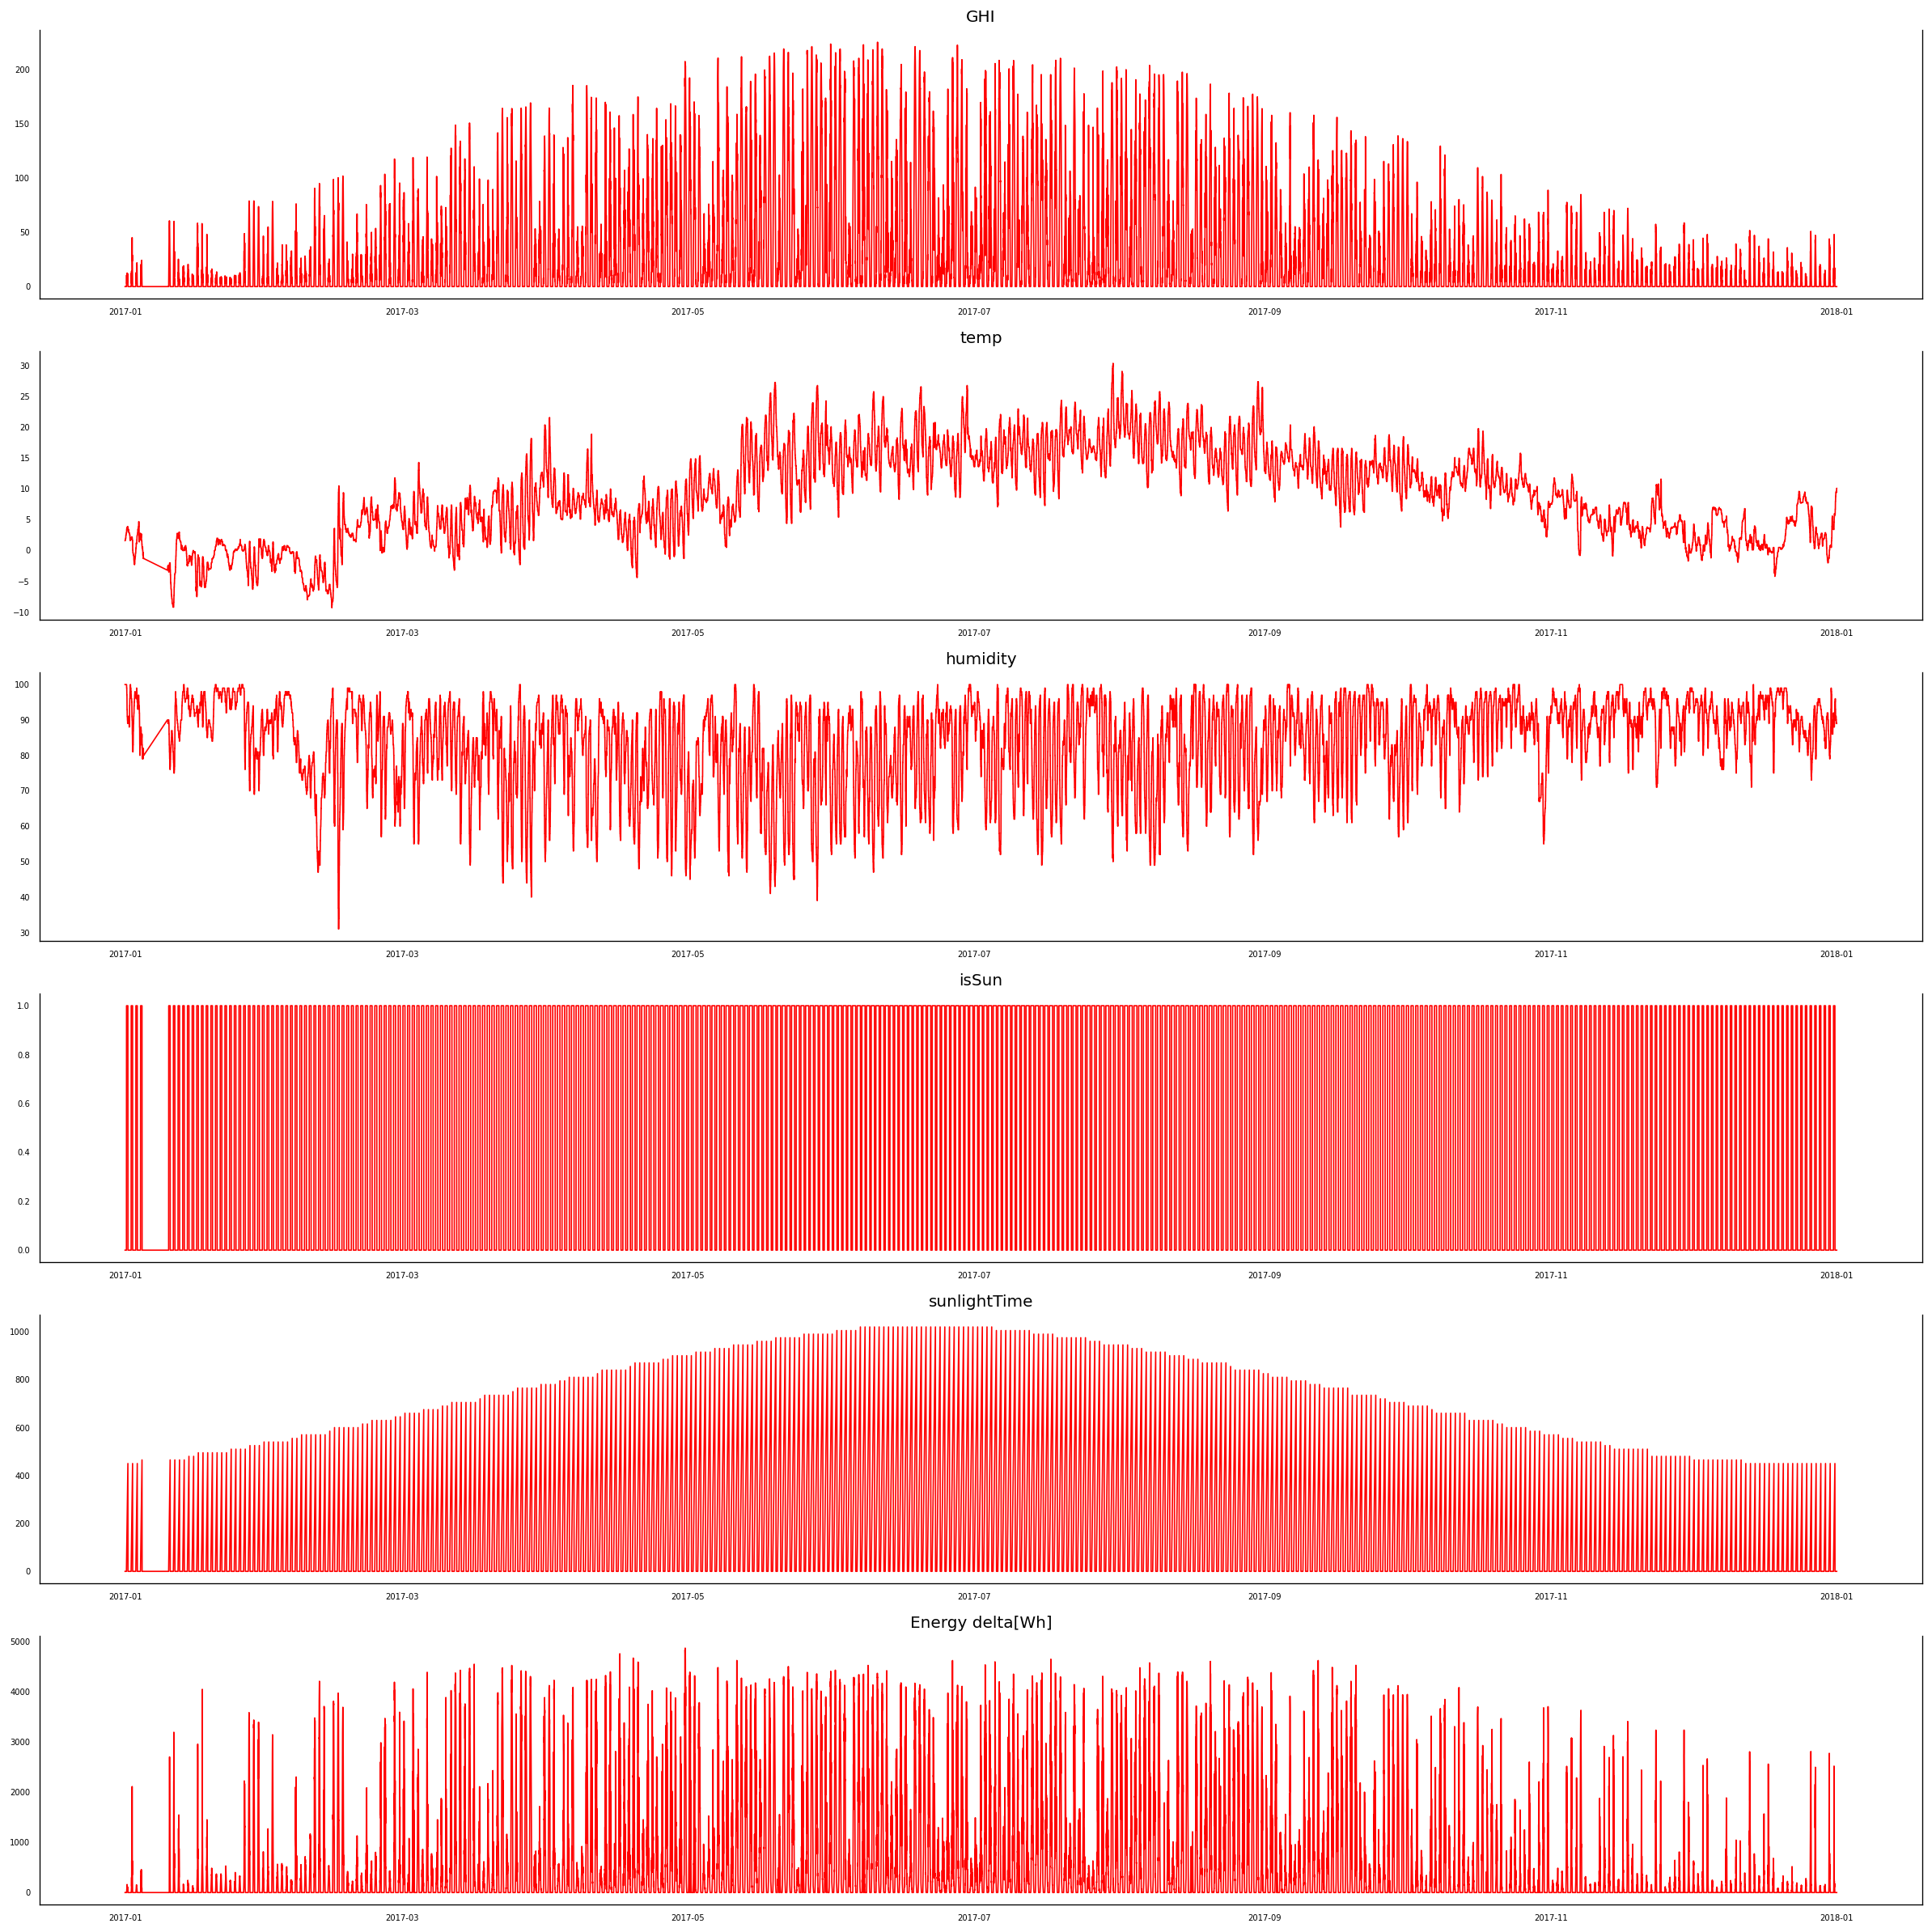

In [66]:
fig, axes = plt.subplots(nrows=len(X_V.columns), ncols=1, dpi=120, figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    data = X_V[X_V.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(X_V.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [67]:
for i in range(len(X_V.columns)):
  ad_fuller_result_i = adfuller(X_V[X_V.columns[i]])
  print(X_V.columns[i])
  print(f'ADF Statistic: {ad_fuller_result_i[0]}')
  print(f'p-value: {ad_fuller_result_i[1]}')
  print('--------------------------')


GHI
ADF Statistic: -33.22484588226617
p-value: 0.0
--------------------------
temp
ADF Statistic: -4.330112940002748
p-value: 0.00039379505959446365
--------------------------
humidity
ADF Statistic: -12.699848048969356
p-value: 1.0858795735490671e-23
--------------------------
isSun
ADF Statistic: -37.52593892314914
p-value: 0.0
--------------------------
sunlightTime
ADF Statistic: -33.16307626307293
p-value: 0.0
--------------------------
Energy delta[Wh]
ADF Statistic: -29.77510923834875
p-value: 0.0
--------------------------


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_V,Y_V, test_size = 0.2, random_state=42,shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27648, 6), (27648, 1), (6912, 6), (6912, 1))

In [69]:
from statsmodels.tsa.api import VAR

# 1. Fit the VAR model with automatic lag selection
modelV = VAR(X_train)  # X_train is your input data
lag_order = modelV.select_order(maxlags=15)  # Check up to 15 lags
print(lag_order.summary())

# 2. Use the best lag (e.g., based on AIC)
best_lag = 5
fitted_model = modelV.fit(maxlags=best_lag)
start=len(X_train)
end=len(X_train)+len(X_test)-1


# 3. Forecast future values
n_forecast_steps = 10  # Number of time steps to forecast
last_lagged_values = X_train.values[-best_lag:]
forecast = fitted_model.forecast(y=last_lagged_values, steps=len(X_train))

print("Forecasted Values:")
print(forecast)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        36.83       36.83   9.882e+15       36.83
1        18.68       18.70   1.301e+08       18.69
2        18.56       18.58   1.149e+08       18.57
3        18.45       18.49   1.032e+08       18.46
4        18.36       18.41   9.425e+07       18.38
5        17.73       17.79   5.025e+07       17.75
6        17.72      17.79*   4.962e+07       17.74
7        17.72       17.79   4.940e+07       17.74
8        17.71       17.80   4.920e+07       17.74
9        17.70       17.80   4.879e+07       17.73
10       17.70       17.81   4.845e+07       17.73
11       17.69       17.81   4.821e+07       17.73
12       17.69       17.82   4.810e+07       17.73
13       17.68       17.82   4.758e+07      17.72*
14       17.68       17.83   4.748e+07       17.72
15      17.67*       17.84  4.743e+07*       17.73
-------------------------------

In [70]:
forecast=pd.DataFrame(forecast)
forecast.columns=X_V.columns
print(forecast.shape)

(27648, 6)


In [71]:
forecast.index=X_V.index[:len(forecast)]
forecast

GHI       temp   humidity     isSun  sunlightTime  \
Time                                                                           
2017-01-01 00:00:00   0.463100  11.589411  96.666056  0.031507      1.430120   
2017-01-01 00:15:00   1.267365  11.582809  96.547185  0.062330      2.614797   
2017-01-01 00:30:00   2.132352  11.576688  96.429666  0.091983      3.740021   
2017-01-01 00:45:00   3.052676  11.572259  96.311193  0.122890      7.335097   
2017-01-01 01:00:00   3.973060  11.428758  96.731563  0.152204     10.762917   
...                        ...        ...        ...       ...           ...   
2017-10-20 22:45:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-10-20 23:00:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-10-20 23:15:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-10-20 23:30:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-10-20 23:45:00  34.479169  10.425846  82.047493  0.558754    238.859368   

                     Energy delta[Wh]  
Time                                   
2017-01-01 00:00:00         -5.015153  
2017-01-01 00:15:00          6.379017  
2017-01-01 00:30:00         18.020437  
2017-01-01 00:45:00         30.247678  
2017-01-01 01:00:00         40.674521  
...                               ...  
2017-10-20 22:45:00        622.822520  
2017-10-20 23:00:00        622.822520  
2017-10-20 23:15:00        622.822520  
2017-10-20 23:30:00        622.822520  
2017-10-20 23:45:00        622.822520  

[27648 rows x 6 columns]

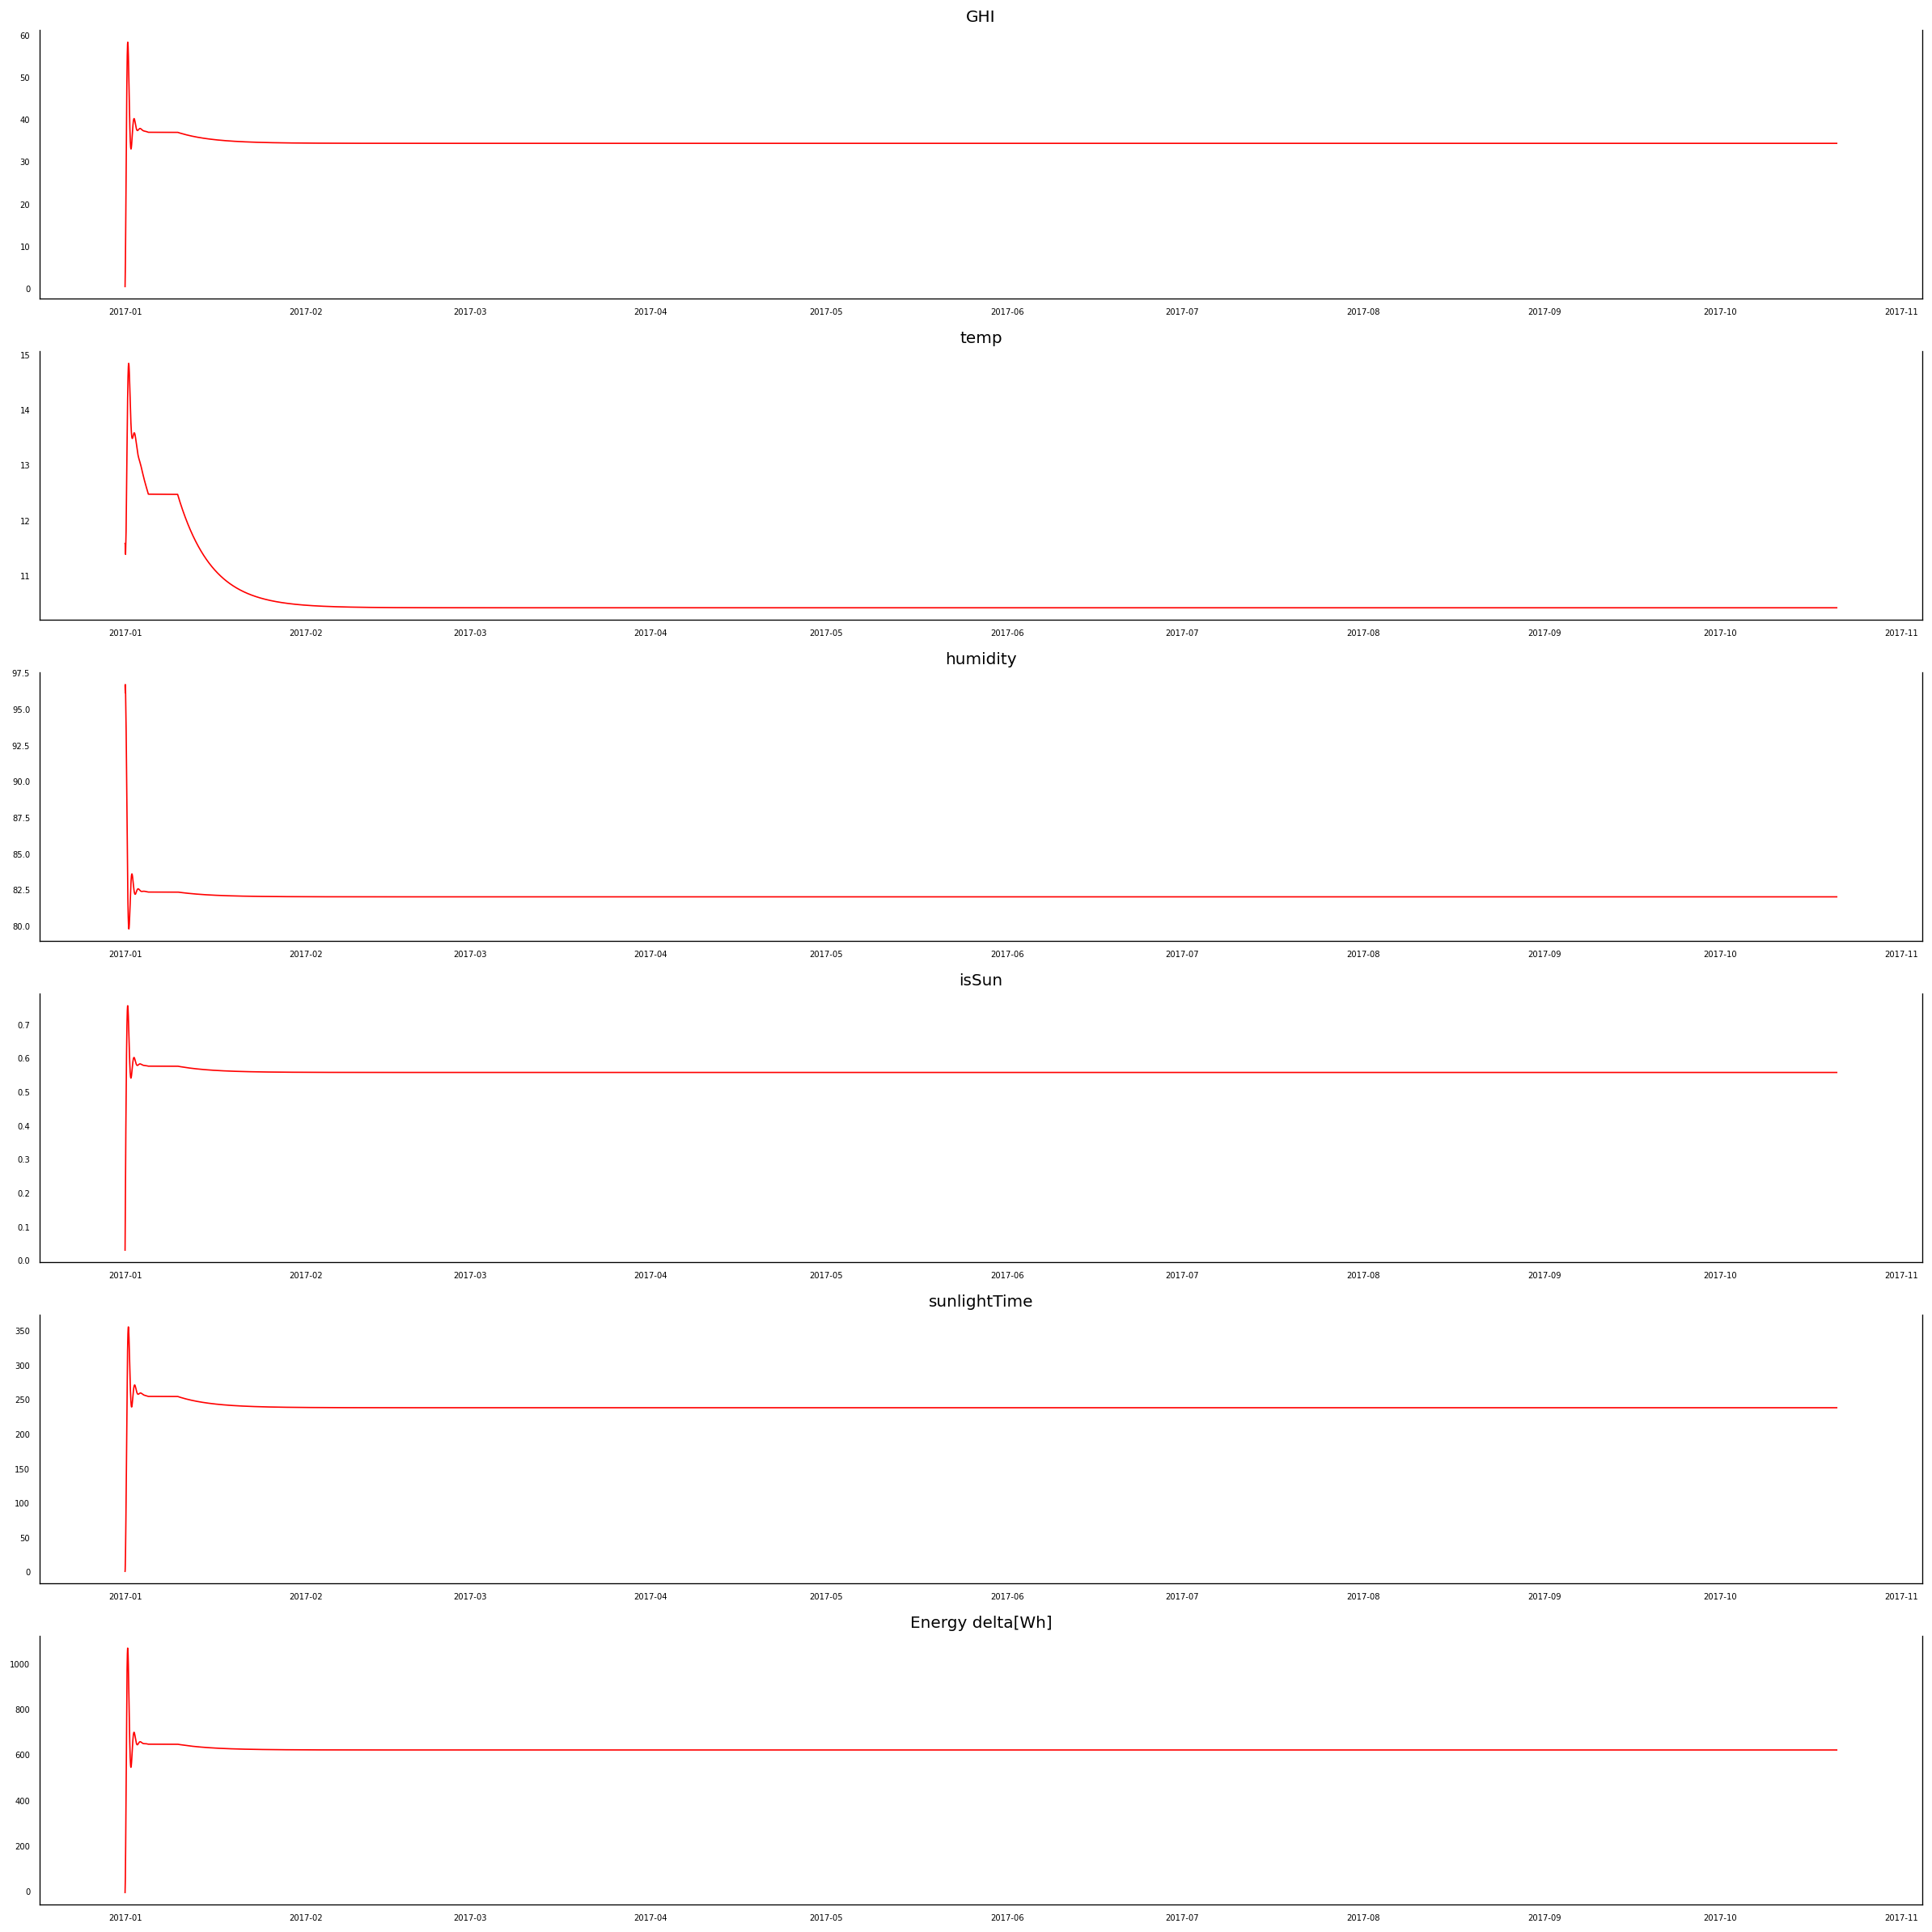

In [72]:
fig, axes = plt.subplots(nrows=len(X_V.columns), ncols=1, dpi=120, figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    data = forecast[forecast.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(forecast.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# NOW CREATE A DATASET FOR ENSEMBLE ***MODEL***

In [73]:
start=0
end=len(Y_train_A)-1

#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph

PredA = modelA.predict(start=start, end=end, typ='levels').rename('SARIMAX predictions')

index_future_dates = pd.date_range(start='2017-01-01', periods=len(PredA), freq='15T')
PredA.index = index_future_dates[:len(PredA)]
PredA=PredA.to_frame()
PredA.columns=['Energy delta[Wh]']




In [74]:
PredA

Energy delta[Wh]
2017-01-01 00:00:00          0.000000
2017-01-01 00:15:00          0.000000
2017-01-01 00:30:00          0.000000
2017-01-01 00:45:00          0.000000
2017-01-01 01:00:00          0.000000
...                               ...
2017-10-15 22:45:00          1.077156
2017-10-15 23:00:00          0.822042
2017-10-15 23:15:00          0.607495
2017-10-15 23:30:00          2.751683
2017-10-15 23:45:00         -4.734174

[27648 rows x 1 columns]

In [75]:
yPred=modelL.predict(X_train_L)
yPred

863/863 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


array([[-7.9648197e-04,  3.3925939e-01,  8.5161048e-01, -3.3542395e-02,
        -2.7180687e-02, -6.0799271e-03],
       [-3.8226247e-03,  3.4448451e-01,  8.7193757e-01,  4.2999506e-02,
        -8.0499500e-03, -5.5035502e-03],
       [-8.8982582e-03,  3.3277816e-01,  8.8013375e-01,  1.3833642e-02,
        -2.6550129e-02, -1.0885730e-02],
       ...,
       [-1.2577772e-03,  5.1801336e-01,  9.3040466e-01,  3.6116481e-02,
        -1.2088075e-02, -7.4611157e-03],
       [ 5.2559376e-04,  5.1854134e-01,  9.2720199e-01,  3.9934337e-02,
        -9.5726699e-03, -5.9334487e-03],
       [-3.4368038e-04,  5.1875752e-01,  9.2641598e-01,  3.8635194e-02,
        -1.0111943e-02, -6.6929460e-03]], dtype=float32)

In [76]:
yPred.shape

(27600, 6)

In [77]:
X_L.shape

(34560, 6)

In [78]:
PredL=pd.DataFrame(yPred)
PredL.columns=X_L.columns
PredL.index=X_L.index[:len(yPred)]


In [79]:
PredL

GHI      temp  humidity     isSun  sunlightTime  \
Time                                                                        
2017-01-01 00:00:00 -0.000796  0.339259  0.851610 -0.033542     -0.027181   
2017-01-01 00:15:00 -0.003823  0.344485  0.871938  0.043000     -0.008050   
2017-01-01 00:30:00 -0.008898  0.332778  0.880134  0.013834     -0.026550   
2017-01-01 00:45:00 -0.001652  0.334281  0.878797  0.039160     -0.012447   
2017-01-01 01:00:00 -0.003917  0.334302  0.879590  0.039873     -0.012387   
...                       ...       ...       ...       ...           ...   
2017-10-20 10:45:00 -0.000409  0.518408  0.938245  0.039893     -0.009818   
2017-10-20 11:00:00 -0.000409  0.518408  0.938246  0.039893     -0.009818   
2017-10-20 11:15:00 -0.001258  0.518013  0.930405  0.036116     -0.012088   
2017-10-20 11:30:00  0.000526  0.518541  0.927202  0.039934     -0.009573   
2017-10-20 11:45:00 -0.000344  0.518758  0.926416  0.038635     -0.010112   

                     Energy delta[Wh]  
Time                                   
2017-01-01 00:00:00         -0.006080  
2017-01-01 00:15:00         -0.005504  
2017-01-01 00:30:00         -0.010886  
2017-01-01 00:45:00         -0.004902  
2017-01-01 01:00:00         -0.007392  
...                               ...  
2017-10-20 10:45:00         -0.006519  
2017-10-20 11:00:00         -0.006519  
2017-10-20 11:15:00         -0.007461  
2017-10-20 11:30:00         -0.005933  
2017-10-20 11:45:00         -0.006693  

[27600 rows x 6 columns]

In [80]:
PredV=pd.DataFrame(forecast)
PredV.columns=X_V.columns
PredV.index=X_V.index[-len(forecast):]
PredV

GHI       temp   humidity     isSun  sunlightTime  \
Time                                                                           
2017-03-19 00:00:00   0.463100  11.589411  96.666056  0.031507      1.430120   
2017-03-19 00:15:00   1.267365  11.582809  96.547185  0.062330      2.614797   
2017-03-19 00:30:00   2.132352  11.576688  96.429666  0.091983      3.740021   
2017-03-19 00:45:00   3.052676  11.572259  96.311193  0.122890      7.335097   
2017-03-19 01:00:00   3.973060  11.428758  96.731563  0.152204     10.762917   
...                        ...        ...        ...       ...           ...   
2017-12-31 22:45:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-12-31 23:00:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-12-31 23:15:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-12-31 23:30:00  34.479169  10.425846  82.047493  0.558754    238.859368   
2017-12-31 23:45:00  34.479169  10.425846  82.047493  0.558754    238.859368   

                     Energy delta[Wh]  
Time                                   
2017-03-19 00:00:00         -5.015153  
2017-03-19 00:15:00          6.379017  
2017-03-19 00:30:00         18.020437  
2017-03-19 00:45:00         30.247678  
2017-03-19 01:00:00         40.674521  
...                               ...  
2017-12-31 22:45:00        622.822520  
2017-12-31 23:00:00        622.822520  
2017-12-31 23:15:00        622.822520  
2017-12-31 23:30:00        622.822520  
2017-12-31 23:45:00        622.822520  

[27648 rows x 6 columns]

In [81]:
PredL['Energy delta[Wh]']

Time
2017-01-01 00:00:00   -0.006080
2017-01-01 00:15:00   -0.005504
2017-01-01 00:30:00   -0.010886
2017-01-01 00:45:00   -0.004902
2017-01-01 01:00:00   -0.007392
                         ...   
2017-10-20 10:45:00   -0.006519
2017-10-20 11:00:00   -0.006519
2017-10-20 11:15:00   -0.007461
2017-10-20 11:30:00   -0.005933
2017-10-20 11:45:00   -0.006693
Name: Energy delta[Wh], Length: 27600, dtype: float32

In [82]:
Y=Y.to_frame()
Y


Energy delta[Wh]
Time                                 
2017-01-01 00:00:00                 0
2017-01-01 00:15:00                 0
2017-01-01 00:30:00                 0
2017-01-01 00:45:00                 0
2017-01-01 01:00:00                 0
...                               ...
2017-12-31 22:45:00                 0
2017-12-31 23:00:00                 0
2017-12-31 23:15:00                 0
2017-12-31 23:30:00                 0
2017-12-31 23:45:00                 0

[34560 rows x 1 columns]

In [83]:
# Step 1: Convert all variables into DataFrames with column names
y_train_A = pd.DataFrame(PredA['Energy delta[Wh]'])
y_train_L = pd.DataFrame(PredL['Energy delta[Wh]'])
y_train_V = pd.DataFrame(PredV['Energy delta[Wh]'])
y_train_R = pd.DataFrame(Y['Energy delta[Wh]'])

# Step 2: Concatenate the DataFrames along columns
y_train_combined = pd.concat([y_train_A, y_train_L, y_train_V, y_train_R], axis=1)
y_train_combined.columns = ['ARIMA', 'LSTM', 'VAM', 'Actual Value']


In [84]:
y_train_combined.dropna(inplace=True)

In [85]:
y_train_combined

ARIMA      LSTM         VAM  Actual Value
2017-03-19 00:00:00  3.696351  0.047502   -5.015153           0.0
2017-03-19 00:15:00  0.033098  0.056089    6.379017           0.0
2017-03-19 00:30:00  0.043152  0.099709   18.020437           0.0
2017-03-19 00:45:00  4.528662  0.006290   30.247678           0.0
2017-03-19 01:00:00  0.829011  0.070317   40.674521           0.0
...                       ...       ...         ...           ...
2017-10-15 22:45:00  1.077156  0.275976  622.822520           0.0
2017-10-15 23:00:00  0.822042  0.238538  622.822520           0.0
2017-10-15 23:15:00  0.607495  0.203156  622.822520           0.0
2017-10-15 23:30:00  2.751683  0.161795  622.822520           0.0
2017-10-15 23:45:00 -4.734174  0.118219  622.822520           0.0

[20256 rows x 4 columns]

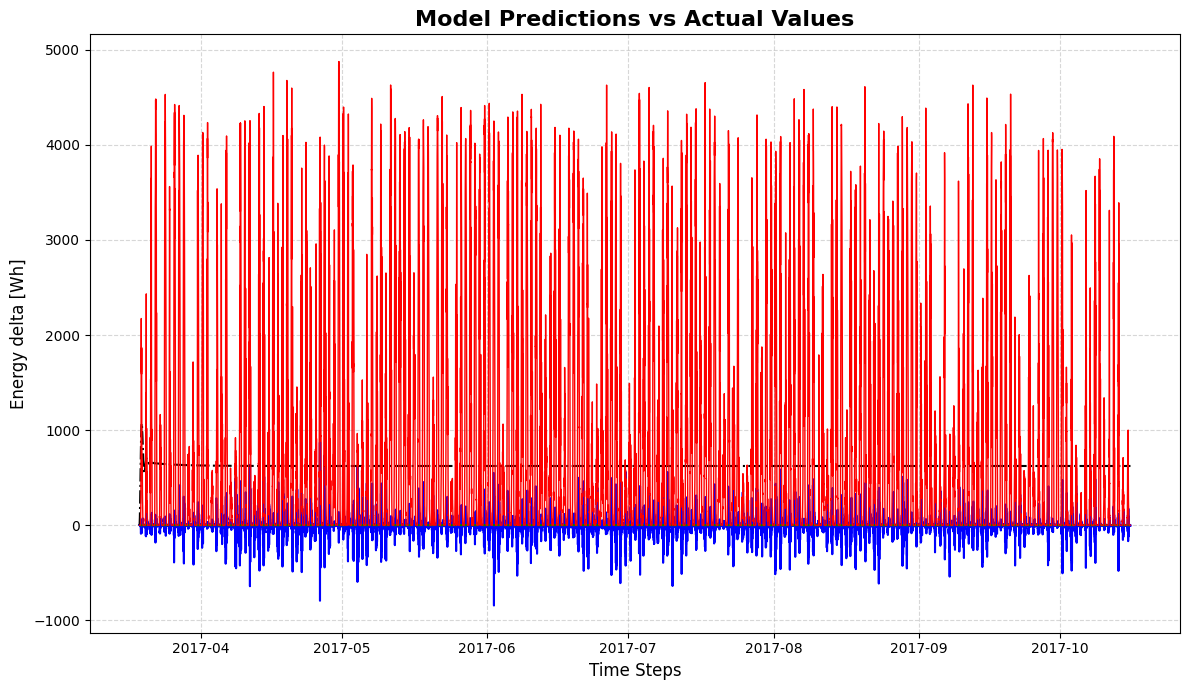

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))

plt.plot(y_train_combined['ARIMA'], color='blue', linestyle='-', label='ARIMA')
plt.plot(y_train_combined['LSTM'], color='green', linestyle='--', label='LSTM')
plt.plot(y_train_combined['VAM'], color='black', linestyle='-.', label='VAM')
plt.plot(y_train_combined['Actual Value'], color='red', linestyle='-', linewidth=1, label='Actual Value')
plt.title("Model Predictions vs Actual Values", fontsize=16, fontweight='bold')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Energy delta [Wh]", fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



# ***NOW BEGIN WITH  ENSEMBLE MODEL***

In [87]:
X_train, X_test, y_train, y_test = train_test_split(y_train_combined.drop('Actual Value',axis=1),y_train_combined['Actual Value'], test_size = 0.2, random_state=42,shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16204, 3), (16204,), (4052, 3), (4052,))

In [88]:
X_test

ARIMA      LSTM        VAM
2017-09-03 19:00:00  3.779061  0.178099  622.82252
2017-09-03 19:15:00 -2.116354  0.103586  622.82252
2017-09-03 19:30:00 -1.258328  0.152761  622.82252
2017-09-03 19:45:00 -3.242461  0.191611  622.82252
2017-09-03 20:00:00  4.858572  0.175683  622.82252
...                       ...       ...        ...
2017-10-15 22:45:00  1.077156  0.275976  622.82252
2017-10-15 23:00:00  0.822042  0.238538  622.82252
2017-10-15 23:15:00  0.607495  0.203156  622.82252
2017-10-15 23:30:00  2.751683  0.161795  622.82252
2017-10-15 23:45:00 -4.734174  0.118219  622.82252

[4052 rows x 3 columns]

# ***MLP***

In [89]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [90]:
model_mlp=Sequential([
    Dense(100,input_shape=(3,),activation='relu'),
    Dense(100,activation='relu'),
    Dense(1,activation='linear'),
])

In [91]:
model_mlp.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [111]:
model_mlp.fit(X_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 920566.5000 - mae: 647.6069
Epoch 2/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 919787.4375 - mae: 647.6548
Epoch 3/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 895607.2500 - mae: 634.4327
Epoch 4/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 931829.9375 - mae: 653.1475
Epoch 5/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 897429.8750 - mae: 633.4859
Epoch 6/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 901194.8125 - mae: 628.1108
Epoch 7/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 891969.0625 - mae: 629.9051
Epoch 8/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 877716.0625 - mae: 623.1823
Epoch 9/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 895369.8125 - mae: 629.3122
Epoch 10/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 893457.6875 - mae: 628.6195
Epoch 11/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 878

In [112]:
model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,805 (124.24 KB)

 Trainable params: 10,601 (41.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,204 (82.83 KB)

In [113]:
model_mlp_res=model_mlp.predict(X_test)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/dense_1_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-113-cf2aaf5cf31b>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 212, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

Matrix size-incompatible: In[0]: [32,4], In[1]: [3,100]
	 [[{{node sequential_1_1/dense_1_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_2269275]

In [114]:
MLPdf = pd.DataFrame(model_mlp_res, columns=["MLP Output"])

In [115]:
MLPdf.index=X_test.index
MLPdf

MLP Output
2017-09-03 19:00:00  379.940857
2017-09-03 19:15:00  268.053009
2017-09-03 19:30:00  236.622070
2017-09-03 19:45:00  234.972534
2017-09-03 20:00:00  447.364960
...                         ...
2017-10-15 22:45:00  190.875931
2017-10-15 23:00:00  206.062973
2017-10-15 23:15:00  221.342697
2017-10-15 23:30:00  338.780365
2017-10-15 23:45:00  339.487793

[4052 rows x 1 columns]

# ***CNN MODEL***

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [117]:
model_cnn=Sequential([
    Conv1D(128,kernel_size=2,input_shape=(3,1),activation='relu'),
    MaxPooling1D(pool_size=2),
    Dense(64,activation='relu'),
    Dense(1,activation='linear'),
])


In [118]:
model_cnn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [119]:
# Summary of the model
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 128)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1, 1)                │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
history = model_cnn.fit(X_train,y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1147220.1250 - mae: 765.4002
Epoch 2/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 923792.1250 - mae: 647.8137
Epoch 3/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 888763.5625 - mae: 636.8796
Epoch 4/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 870010.6250 - mae: 631.4653
Epoch 5/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 872659.5000 - mae: 627.6359
Epoch 6/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 863656.6875 - mae: 621.8288
Epoch 7/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 860957.4375 - mae: 623.1652
Epoch 8/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 846550.1875 - mae: 610.5203
Epoch 9/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 853145.5000 - mae: 614.5366
Epoch 10/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 845573.6250 - mae: 606.1423
Epoch 11/20
16204/16204 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 84

In [121]:
model_cnn_res=model_cnn.predict(X_test)


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [122]:
model_cnn_ = model_cnn_res.reshape(-1, 1)
CNNdf = pd.DataFrame(model_cnn_, columns=["CNN Output"])


In [123]:
CNNdf.index=X_test.index
CNNdf

CNN Output
2017-09-03 19:00:00   52.745827
2017-09-03 19:15:00   21.035162
2017-09-03 19:30:00   10.868414
2017-09-03 19:45:00   16.801313
2017-09-03 20:00:00   76.062172
...                         ...
2017-10-15 22:45:00   10.870649
2017-10-15 23:00:00   10.869978
2017-10-15 23:15:00   10.869383
2017-10-15 23:30:00   33.319580
2017-10-15 23:45:00   62.820183

[4052 rows x 1 columns]

# ***SIMPLE MEAN***

In [124]:
X_test['Simple Mean'] = X_test.mean(axis=1)


In [125]:
SimpleMean=X_test['Simple Mean']
SimpleMean

2017-09-03 19:00:00    208.926560
2017-09-03 19:15:00    206.936584
2017-09-03 19:30:00    207.238985
2017-09-03 19:45:00    206.590556
2017-09-03 20:00:00    209.285592
                          ...    
2017-10-15 22:45:00    208.058551
2017-10-15 23:00:00    207.961033
2017-10-15 23:15:00    207.877724
2017-10-15 23:30:00    208.578666
2017-10-15 23:45:00    206.068855
Freq: 15min, Name: Simple Mean, Length: 4052, dtype: float64

In [126]:
ActualData=y_test
ActualData=pd.DataFrame(ActualData)
ActualData.index=X_test.index
ActualData.columns=['Actual Value']
ActualData

Actual Value
2017-09-03 19:00:00           0.0
2017-09-03 19:15:00           0.0
2017-09-03 19:30:00           0.0
2017-09-03 19:45:00           0.0
2017-09-03 20:00:00           0.0
...                           ...
2017-10-15 22:45:00           0.0
2017-10-15 23:00:00           0.0
2017-10-15 23:15:00           0.0
2017-10-15 23:30:00           0.0
2017-10-15 23:45:00           0.0

[4052 rows x 1 columns]

In [127]:
FinalDataframe=pd.concat([SimpleMean,MLPdf,CNNdf,ActualData],axis=1)
FinalDataframe

Simple Mean  MLP Output  CNN Output  Actual Value
2017-09-03 19:00:00   208.926560  379.940857   52.745827           0.0
2017-09-03 19:15:00   206.936584  268.053009   21.035162           0.0
2017-09-03 19:30:00   207.238985  236.622070   10.868414           0.0
2017-09-03 19:45:00   206.590556  234.972534   16.801313           0.0
2017-09-03 20:00:00   209.285592  447.364960   76.062172           0.0
...                          ...         ...         ...           ...
2017-10-15 22:45:00   208.058551  190.875931   10.870649           0.0
2017-10-15 23:00:00   207.961033  206.062973   10.869978           0.0
2017-10-15 23:15:00   207.877724  221.342697   10.869383           0.0
2017-10-15 23:30:00   208.578666  338.780365   33.319580           0.0
2017-10-15 23:45:00   206.068855  339.487793   62.820183           0.0

[4052 rows x 4 columns]

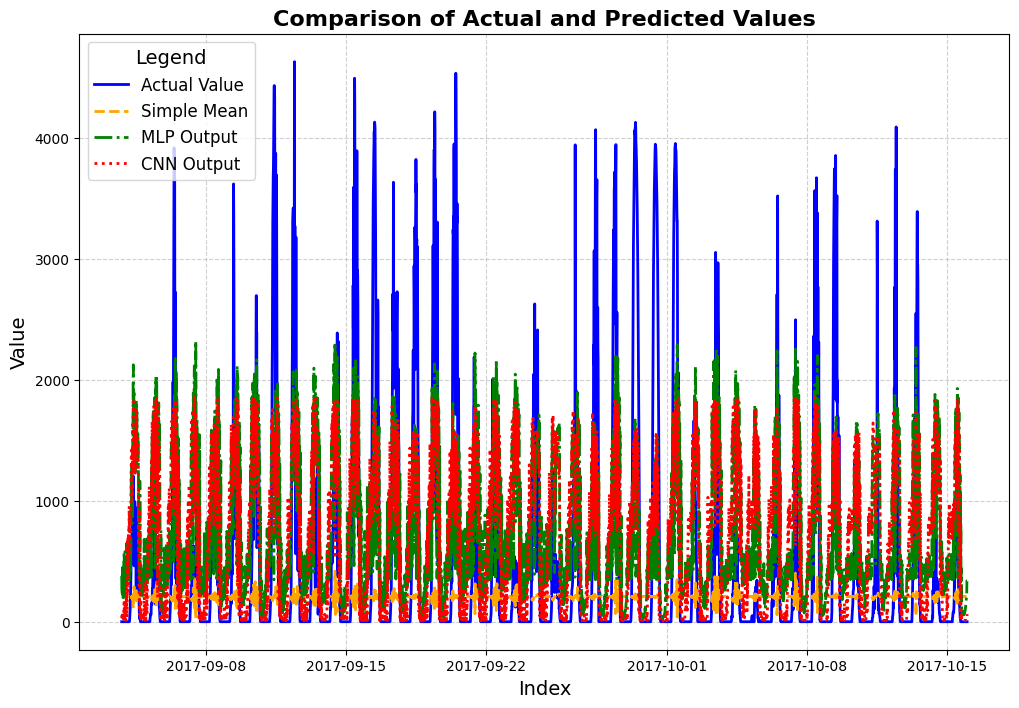

In [128]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each line with custom styles
plt.plot(FinalDataframe['Actual Value'], label='Actual Value', color='blue', linestyle='-', linewidth=2)
plt.plot(FinalDataframe['Simple Mean'], label='Simple Mean', color='orange', linestyle='--', linewidth=2)
plt.plot(FinalDataframe['MLP Output'], label='MLP Output', color='green', linestyle='-.', linewidth=2)
plt.plot(FinalDataframe['CNN Output'], label='CNN Output', color='red', linestyle=':', linewidth=2)

# Add title and labels
plt.title('Comparison of Actual and Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Customize legend
plt.legend(loc='best', fontsize=12, title='Legend', title_fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
